# Complete pipeline

## Loading data

In [25]:
import pandas as pd
import preprocessing

#loading data
df_female = pd.read_csv('data/preprocessed_data/df_female.csv', index_col=[0])
df_age = pd.read_csv('data/preprocessed_data/df_age.csv', index_col=[0])
df_SFI = pd.read_csv('data/preprocessed_data/df_SFI.csv', index_col=[0])
df_uti = pd.read_csv('data/preprocessed_data/df_uti.csv', index_col=[0])
df_admissions = pd.read_csv('data/preprocessed_data/df_admissions.csv', index_col=[0])
df_FIM_total = pd.read_csv('data/preprocessed_data/df_FIM_total.csv', index_col=[0])
df_acute_days = pd.read_csv('data/preprocessed_data/df_acute_days.csv', index_col=[0])
df_brain_injury = pd.read_csv('data/preprocessed_data/df_brain_injury.csv', index_col=[0])
df_outcome = pd.read_csv('data/preprocessed_data/df_outcome.csv', index_col=[0])

df_admissions_resampled = pd.read_csv('data/preprocessed_data/df_admissions_resampled.csv', index_col=[0])

#### Full models

In [26]:
predictor_dict = {'df_SFI_text':df_SFI, 
                'df_age_static':df_age, 
                'df_female_static':df_female, 
                'df_acute_days_static':df_acute_days, 
                'df_FIM_total_dynamic':df_FIM_total, 
                'df_brain_injury_static':df_brain_injury} 

predictor_dict_train, predictor_dict_test, y_train_df, y_test_df, df_admissions_train, df_admissions_test = preprocessing.data_split(df_outcome = df_outcome, 
                                                                                                                                    predictor_dict = predictor_dict, 
                                                                                                                                    df_admissions = df_admissions, 
                                                                                                                                    test_size = 0.3)

Number of positive observations in trainingset:224
Percentage of positive class in trainingset: 31.197771587743734
Number of positive observations in testset:97
Percentage of positive class in testset: 31.3915857605178


#### Resampled full models

In [27]:
#NB same input as the full model, except for a resampled admissions df ensuring appropriate prediction time for each patient, NB: ONLY one prediction time per patient
predictor_dict_train_resampled, predictor_dict_test_resampled, y_train_df_resampled, y_test_df_resampled, df_admissions_train_resampled, df_admissions_test_resampled = preprocessing.data_split(df_outcome = df_outcome, 
                                                                                                                                                                                                predictor_dict = predictor_dict, 
                                                                                                                                                                                                df_admissions = df_admissions_resampled, 
                                                                                                                                                                                                test_size = 0.3)
                                                                                                                                                                                                

Number of positive observations in trainingset:224
Percentage of positive class in trainingset: 31.197771587743734
Number of positive observations in testset:97
Percentage of positive class in testset: 31.3915857605178


#### Text only model

In [28]:
predictor_dict_text = {'df_SFI_text':df_SFI}  

predictor_dict_train_text, predictor_dict_test_text, y_train_df_text, y_test_df_text, df_admissions_train_text, df_admissions_test_text = preprocessing.data_split(df_outcome = df_outcome, 
                                                                                                                                                                    predictor_dict = predictor_dict_text, 
                                                                                                                                                                    df_admissions = df_admissions, 
                                                                                                                                                                    test_size = 0.3)

Number of positive observations in trainingset:224
Percentage of positive class in trainingset: 31.197771587743734
Number of positive observations in testset:97
Percentage of positive class in testset: 31.3915857605178


In [29]:
# predictor_dict_text_resampled = {'df_SFI_text':df_SFI_resampled}  

predictor_dict_train_text_resampled, predictor_dict_test_text_resampled, y_train_df_text_resampled, y_test_df_text_resampled, df_admissions_train_text_resampled, df_admissions_test_text_resampled = preprocessing.data_split(df_outcome = df_outcome, 
                                                                                                                                                                                                                            predictor_dict = predictor_dict_text, 
                                                                                                                                                                                                                            df_admissions = df_admissions_resampled, 
                                                                                                                                                                                                                            test_size = 0.3)

Number of positive observations in trainingset:224
Percentage of positive class in trainingset: 31.197771587743734
Number of positive observations in testset:97
Percentage of positive class in testset: 31.3915857605178


## Creating embeddings
NB Text only model uses same embeddings as full model

### Sentence embeddings

#### Full model

In [8]:
from sentence_embeddings import sentence_embeddings
df_sentence_train = sentence_embeddings(df_free_text = predictor_dict_train["df_SFI_text"], transformer_model = 'encoder-large-v1')
df_sentence_test = sentence_embeddings(df_free_text = predictor_dict_test["df_SFI_text"], transformer_model = 'encoder-large-v1')

df_sentence_MeDa_train = sentence_embeddings(df_free_text = predictor_dict_train["df_SFI_text"], transformer_model = 'MeDa-BERT')
df_sentence_MeDa_test = sentence_embeddings(df_free_text = predictor_dict_test["df_SFI_text"], transformer_model = 'MeDa-BERT')


No sentence-transformers model found with name encoder-large-v1. Creating a new one with MEAN pooling.
Some weights of BertModel were not initialized from the model checkpoint at encoder-large-v1 and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No sentence-transformers model found with name encoder-large-v1. Creating a new one with MEAN pooling.
Some weights of BertModel were not initialized from the model checkpoint at encoder-large-v1 and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No sentence-transformers model found with name MeDa-BERT. Creating a new one with MEAN pooling.
Some weights of BertModel were not initialized from the model checkpoint at MeDa-BERT and are newly initialized: ['bert.pooler

#### Resampled full model

In [9]:
from sentence_embeddings import sentence_embeddings
df_sentence_train_resampled = sentence_embeddings(df_free_text = predictor_dict_train_resampled["df_SFI_text"], transformer_model = 'encoder-large-v1')
df_sentence_test_resampled = sentence_embeddings(df_free_text = predictor_dict_test_resampled["df_SFI_text"], transformer_model = 'encoder-large-v1')

df_sentence_MeDa_train_resampled = sentence_embeddings(df_free_text = predictor_dict_train_resampled["df_SFI_text"], transformer_model = 'MeDa-Bert')
df_sentence_MeDa_test_resampled = sentence_embeddings(df_free_text = predictor_dict_test_resampled["df_SFI_text"], transformer_model = 'MeDa-Bert')


No sentence-transformers model found with name encoder-large-v1. Creating a new one with MEAN pooling.
Some weights of BertModel were not initialized from the model checkpoint at encoder-large-v1 and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No sentence-transformers model found with name encoder-large-v1. Creating a new one with MEAN pooling.
Some weights of BertModel were not initialized from the model checkpoint at encoder-large-v1 and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No sentence-transformers model found with name MeDa-Bert. Creating a new one with MEAN pooling.
Some weights of BertModel were not initialized from the model checkpoint at MeDa-Bert and are newly initialized: ['bert.pooler

### Hyperparameter search of TF-IDF

In [8]:
%%capture

#Capture is important to have in this cell, otherwise there will be so much output that the kernel will crash
from tfidf_hyperparametersearch import tfidf_hyperparametersearch

best_params = tfidf_hyperparametersearch(predictor_dict_train, 
                                        predictor_dict_test, 
                                        df_admissions_train, 
                                        df_admissions_test, 
                                        y_train_df, 
                                        y_test_df)


In [9]:
%%capture
best_params_resampled = tfidf_hyperparametersearch(predictor_dict_train_resampled, 
                                                    predictor_dict_test_resampled, 
                                                    df_admissions_train_resampled, 
                                                    df_admissions_test_resampled, 
                                                    y_train_df_resampled, 
                                                    y_test_df_resampled)

In [10]:
%%capture
#from tfidf_hyperparametersearch_temp import tfidf_hyperparametersearch #Burde være det samme nu
#Even though the text only model uses the same embeddings as full model, it might require different settings to have the best XGB performance

best_params_text = tfidf_hyperparametersearch(predictor_dict_train_text, 
                                        predictor_dict_test_text, 
                                        df_admissions_train_text, 
                                        df_admissions_test_text, 
                                        y_train_df_text, 
                                        y_test_df_text, 
                                        categorical = False)

In [10]:
%%capture

from tfidf_hyperparametersearch import tfidf_hyperparametersearch

best_params_text_resampled = tfidf_hyperparametersearch(predictor_dict_train_text_resampled, 
                                        predictor_dict_test_text_resampled, 
                                        df_admissions_train_text_resampled, 
                                        df_admissions_test_text_resampled, 
                                        y_train_df_text_resampled, 
                                        y_test_df_text_resampled, 
                                        categorical = False)

In [11]:
#Printing best hyperparameters found in the study above 
print(best_params)

{'min_df_trial': 70, 'max_df_trial': 0.7, 'max_features_trial': 500, 'ngram_range_upper_trial': 2}


In [12]:
print(best_params_resampled)

{'min_df_trial': 0, 'max_df_trial': 0.7, 'max_features_trial': 500, 'ngram_range_upper_trial': 1}


In [13]:
print(best_params_text)

{'min_df_trial': 100, 'max_df_trial': 0.9, 'max_features_trial': 600, 'ngram_range_upper_trial': 2}


In [11]:
print(best_params_text_resampled)

{'min_df_trial': 50, 'max_df_trial': 0.9, 'max_features_trial': 200, 'ngram_range_upper_trial': 2}


#### Full model

In [10]:
#Use values found in the hyperparameter search:
#{'min_df_trial': 70, 'max_df_trial': 0.7, 'max_features_trial': 500, 'ngram_range_upper_trial': 2}

from tfidf import tf_idf
df_tfidfvect_train, df_tfidfvect_test = tf_idf(predictor_dict_train["df_SFI_text"], 
                                                predictor_dict_test["df_SFI_text"], 
                                                min_df = 70, 
                                                max_df = 0.7, 
                                                max_features = 500, 
                                                ngram_range = (1,2))

e:\Projekter\RHN\linapd\tfidf.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_SFI['note'] = X_train_SFI['note'].str.replace('\d+', '')
e:\Projekter\RHN\linapd\tfidf.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_SFI['note'] = X_test_SFI['note'].str.replace('\d+', '')


Tokens ['adspurgt' 'aff' 'afføring' 'afklemt' 'aftale' 'aftalt' 'aften' 'aftenen'
 'aftenvagt' 'aftenvagten' 'afviser' 'alm' 'anlagt' 'av' 'bad' 'ballon'
 'beder' 'behandling' 'behov' 'bent' 'besøg' 'bind' 'bjarne' 'blank' 'ble'
 'ble bukser' 'ble kl' 'ble morgen' 'ble nat' 'ble samt' 'ble seng'
 'ble skift' 'ble skiftes' 'ble skiftet' 'ble tør' 'ble underlag'
 'ble uridom' 'ble vandl' 'ble vandladning' 'ble våd' 'blee' 'bleen'
 'bleen tør' 'bleen våd' 'bleer' 'bleskift' 'blevet' 'blod' 'blære'
 'blæren' 'blærescan' 'blærescannes' 'blærescannet' 'blærescannet ml'
 'blærescanning' 'blæreskannet' 'brug' 'bruge' 'brugt' 'brugt kolbe'
 'bukseble' 'bukser' 'bukserne' 'bundskift' 'bundskifte' 'bundskiftet'
 'både' 'bækken' 'bækken seng' 'bækken sengen' 'bækkenstol' 'bækkenstolen'
 'bælteble' 'ca' 'ca ml' 'ca time' 'ch' 'dag' 'dage' 'dagen' 'dagvagten'
 'dd' 'del' 'diurese' 'dv' 'effekt' 'efterfølgende' 'efterscannet' 'ej'
 'ekstra' 'erik' 'evt' 'falder' 'faldet' 'faldt' 'fik' 'finde' 'fint'


#### Resampled full model

In [11]:
#Use values found in the hyperparameter search
# {'min_df_trial': 0, 'max_df_trial': 0.7, 'max_features_trial': 500, 'ngram_range_upper_trial': 1}


from tfidf import tf_idf
df_tfidfvect_train_resampled, df_tfidfvect_test_resampled = tf_idf(predictor_dict_train_resampled["df_SFI_text"], 
                                                                    predictor_dict_test_resampled["df_SFI_text"], 
                                                                    min_df = 0, 
                                                                    max_df = 0.7, 
                                                                    max_features = 500, 
                                                                    ngram_range = (1,1))

e:\Projekter\RHN\linapd\tfidf.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_SFI['note'] = X_train_SFI['note'].str.replace('\d+', '')
e:\Projekter\RHN\linapd\tfidf.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_SFI['note'] = X_test_SFI['note'].str.replace('\d+', '')


Tokens ['adspurgt' 'aff' 'afføring' 'afklemning' 'afklemt' 'afprøve' 'aftale'
 'aftaler' 'aftalt' 'aften' 'aftenen' 'aftenvagt' 'aftenvagten' 'afventer'
 'afviser' 'alm' 'anlagt' 'av' 'bad' 'badeværelset' 'bagefter' 'ballon'
 'bare' 'beder' 'bedre' 'bedt' 'behandling' 'behov' 'benpose' 'bent'
 'besøg' 'bind' 'bjarne' 'blank' 'ble' 'blee' 'bleen' 'bleer' 'bleskift'
 'bleskiftet' 'blevet' 'blod' 'blære' 'blæren' 'blærescan' 'blærescanne'
 'blærescannes' 'blærescannet' 'blærescanning' 'blæreskannet'
 'bodystocking' 'brug' 'bruge' 'bruger' 'brugt' 'bukseble' 'buksebleen'
 'bukser' 'bukserne' 'bundskift' 'bundskifte' 'bundskiftes' 'bundskiftet'
 'både' 'bækken' 'bækkenstol' 'bækkenstolen' 'bælteble' 'ca' 'carsten'
 'ch' 'dag' 'dage' 'dagen' 'dagvagt' 'dagvagten' 'dd' 'del' 'derud'
 'desuden' 'desværre' 'diurese' 'drikke' 'drukket' 'dv' 'dyrkning' 'døgn'
 'effekt' 'efterfølgende' 'efterscan' 'efterscannet' 'eget' 'ej' 'ekstra'
 'else' 'enkelt' 'erik' 'evt' 'falder' 'faldet' 'faldt' 'faste' '

#### Text only model

In [12]:
#Use values found in the hyperparameter search
#{'min_df_trial': 100, 'max_df_trial': 0.9, 'max_features_trial': 600, 'ngram_range_upper_trial': 2}

from tfidf import tf_idf
df_tfidfvect_train_text, df_tfidfvect_test_text = tf_idf(predictor_dict_train_text["df_SFI_text"], 
                                                predictor_dict_test_text["df_SFI_text"], 
                                                min_df = 100, 
                                                max_df = 0.9, 
                                                max_features = 600, 
                                                ngram_range = (1,2))

                        

e:\Projekter\RHN\linapd\tfidf.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_SFI['note'] = X_train_SFI['note'].str.replace('\d+', '')
e:\Projekter\RHN\linapd\tfidf.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_SFI['note'] = X_test_SFI['note'].str.replace('\d+', '')


Tokens ['adspurgt' 'aff' 'afføring' 'afklemt' 'aftale' 'aftalt' 'aften' 'aftenen'
 'aftenvagt' 'aftenvagten' 'afviser' 'alm' 'anlagt' 'av' 'bad' 'beder'
 'behandling' 'behov' 'besøg' 'blank' 'ble' 'ble bukser' 'ble kl'
 'ble morgen' 'ble nat' 'ble samt' 'ble seng' 'ble skift' 'ble skiftes'
 'ble skiftet' 'ble tør' 'ble underlag' 'ble uridom' 'ble vandl'
 'ble vandladning' 'ble våd' 'blee' 'bleen' 'bleen tør' 'bleen våd'
 'bleer' 'bleskift' 'blevet' 'blod' 'blære' 'blæren' 'blærescan'
 'blærescannes' 'blærescannet' 'blærescannet ml' 'blærescanning' 'brug'
 'bruge' 'brugt' 'brugt kolbe' 'bukseble' 'bukser' 'bukserne' 'bundskift'
 'bundskifte' 'bundskiftet' 'både' 'bækken' 'bækken seng' 'bækken sengen'
 'bækkenstol' 'bækkenstolen' 'bælteble' 'ca' 'ca ml' 'ch' 'dag' 'dage'
 'dagen' 'dagvagten' 'dd' 'del' 'diurese' 'dv' 'effekt' 'efterfølgende'
 'efterscannet' 'ej' 'ekstra' 'evt' 'faldet' 'faldt' 'fik' 'finde' 'fint'
 'fjernet' 'forbindelse' 'forbindelse aff' 'forsøg' 'forsøger' 'forsøges'


In [13]:
#Use values found in the hyperparameter search
#{'min_df_trial': 50, 'max_df_trial': 0.9, 'max_features_trial': 200, 'ngram_range_upper_trial': 2}

from tfidf import tf_idf
df_tfidfvect_train_text_resampled, df_tfidfvect_test_text_resampled = tf_idf(predictor_dict_train_text_resampled["df_SFI_text"], 
                                                predictor_dict_test_text_resampled["df_SFI_text"], 
                                                min_df = 50, 
                                                max_df = 0.9, 
                                                max_features = 200, 
                                                ngram_range = (1,2))


e:\Projekter\RHN\linapd\tfidf.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_SFI['note'] = X_train_SFI['note'].str.replace('\d+', '')
e:\Projekter\RHN\linapd\tfidf.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_SFI['note'] = X_test_SFI['note'].str.replace('\d+', '')


Tokens ['aff' 'aften' 'aftenvagten' 'av' 'bad' 'behov' 'ble' 'ble seng'
 'ble skiftet' 'ble uridom' 'ble vandl' 'ble vandladning' 'blee' 'bleen'
 'bleen tør' 'bleen våd' 'bleer' 'bleskift' 'blod' 'blæren' 'blærescannet'
 'bukseble' 'bukser' 'bundskift' 'bundskiftet' 'bækken' 'bækkenstol' 'ca'
 'ca ml' 'dag' 'diurese' 'dv' 'efterfølgende' 'evt' 'faldet' 'fik' 'fint'
 'forbindelse' 'forsøgt' 'fortæller' 'fungerer' 'fået' 'får' 'føler'
 'gang' 'gange' 'gerne' 'givet' 'godt' 'gået' 'går' 'haft'
 'haft vandladning' 'held' 'hele' 'helt' 'hjælp' 'holde' 'hvil' 'ifm'
 'ildelugtende' 'inden' 'kad' 'kad pose' 'kalder' 'kateter' 'kath' 'kl'
 'klar' 'klar urin' 'kolbe' 'kolbe ca' 'kolbe ml' 'kolben' 'komme'
 'komme toilet' 'kommet' 'konc' 'koncentreret' 'koncentreret urin' 'lade'
 'lade vandet' 'let' 'ligger' 'løbet' 'ml' 'ml klar' 'ml kolbe' 'ml urin'
 'morgen' 'mængde' 'mærke' 'nat' 'natten' 'nitrit' 'når' 'obs' 'pga'
 'pose' 'pose tømt' 'posen' 'prøve' 'pt' 'påsat' 'påsat uridom' 'relevant'
 'r

## Preparing specs

#### Full models

In [14]:
from preparing_specs import preparing_specs

######################################### TF-IDF ########################################

################## Train
X_final_train_tfidf, y_final_train_tfidf = preparing_specs(embeddings = df_tfidfvect_train,
                                                            predictor_dict = predictor_dict_train,
                                                            prediction_times = df_admissions_train, 
                                                            outcome_df = y_train_df, 
                                                            embedding_type ="tfidf",
                                                            lookbehind = 4, 
                                                            lookahead = 3)


################## Test
X_final_test_tfidf, y_final_test_tfidf = preparing_specs(embeddings = df_tfidfvect_test,
                                                            predictor_dict = predictor_dict_test,
                                                            prediction_times = df_admissions_test, 
                                                            outcome_df = y_test_df, 
                                                            embedding_type ="tfidf",
                                                            lookbehind = 4, 
                                                            lookahead = 3)


################################## Sentence transformer ##################################

################## Train
X_final_train_sentence, y_final_train_sentence = preparing_specs(embeddings = df_sentence_train,
                                                                predictor_dict = predictor_dict_train,
                                                                prediction_times = df_admissions_train, 
                                                                outcome_df = y_train_df, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################## Test
X_final_test_sentence, y_final_test_sentence = preparing_specs(embeddings = df_sentence_test,
                                                                predictor_dict = predictor_dict_test,
                                                                prediction_times = df_admissions_test, 
                                                                outcome_df = y_test_df, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################################## Sentence transformer, MeDa ##################################

################## Train
X_final_train_sentence_MeDa, y_final_train_sentence_MeDa = preparing_specs(embeddings = df_sentence_MeDa_train,
                                                                predictor_dict = predictor_dict_train,
                                                                prediction_times = df_admissions_train, 
                                                                outcome_df = y_train_df, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################## Test
X_final_test_sentence_MeDa, y_final_test_sentence_MeDa = preparing_specs(embeddings = df_sentence_MeDa_test,
                                                                predictor_dict = predictor_dict_test,
                                                                prediction_times = df_admissions_test, 
                                                                outcome_df = y_test_df, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)



2024-04-16 15:07:29 [INFO] df_FIM_total_dynamic: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:29 [INFO] tfidfadspurgt: Converting timestamp column to datetime64[ns]


Training specs will take a while


2024-04-16 15:07:30 [INFO] tfidfaff: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:30 [INFO] tfidfafføring: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:30 [INFO] tfidfafklemt: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:30 [INFO] tfidfaftale: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:30 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:31 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:31 [INFO] tfidfaftenen: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:31 [INFO] tfidfaftenvagt: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:31 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:31 [INFO] tfidfafviser: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:31 [INFO] tfidfalm: Converting timestamp column to datetime64[ns]
2024-04-16 15:07:32 [INFO] tfidfanlagt: Converti

Training specs will take a while


2024-04-16 15:13:43 [INFO] tfidfaftale: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfaftenen: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfaftenvagt: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfafviser: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfalm: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfanlagt: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfav: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfbad: Converting timestamp column to datetime64[ns]
2024-04-16 15:13:43 [INFO] tfidfballon: Converting time

Training specs will take a while


2024-04-16 15:16:12 [INFO] sentence1: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:12 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:12 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:12 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:13 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:13 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:13 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:13 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:14 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:14 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:14 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 15:16:15 [INFO] sentence12: Converting timestamp column to date

Training specs will take a while


2024-04-16 15:27:22 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:22 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:22 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence13: Converting timestamp column to datetime64[ns]
2024-04-16 15:27:23 [INFO] sentence14: Converting timestamp column to da

Training specs will take a while


2024-04-16 15:31:44 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:44 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:45 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:45 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:45 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:45 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:45 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:45 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:46 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:46 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:46 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 15:31:46 [INFO] sentence13: Converting timestamp column to dat

Training specs will take a while


2024-04-16 15:39:50 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence13: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence14: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence15: Converting timestamp column to datetime64[ns]
2024-04-16 15:39:50 [INFO] sentence16: Converting timestamp column to 

#### Resampled full models

In [15]:
######################################### TF-IDF ########################################

################## Train
X_final_train_tfidf_resampled, y_final_train_tfidf_resampled = preparing_specs(embeddings = df_tfidfvect_train_resampled,
                                                            predictor_dict = predictor_dict_train_resampled,
                                                            prediction_times = df_admissions_train_resampled, 
                                                            outcome_df = y_train_df_resampled, 
                                                            embedding_type ="tfidf",
                                                            lookbehind = 4, 
                                                            lookahead = 3)


################## Test
X_final_test_tfidf_resampled, y_final_test_tfidf_resampled = preparing_specs(embeddings = df_tfidfvect_test_resampled,
                                                            predictor_dict = predictor_dict_test_resampled,
                                                            prediction_times = df_admissions_test_resampled, 
                                                            outcome_df = y_test_df_resampled, 
                                                            embedding_type ="tfidf",
                                                            lookbehind = 4, 
                                                            lookahead = 3)


################################## Sentence transformer ##################################

################## Train
X_final_train_sentence_resampled, y_final_train_sentence_resampled = preparing_specs(embeddings = df_sentence_train_resampled,
                                                                predictor_dict = predictor_dict_train_resampled,
                                                                prediction_times = df_admissions_train_resampled, 
                                                                outcome_df = y_train_df_resampled, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################## Test
X_final_test_sentence_resampled, y_final_test_sentence_resampled = preparing_specs(embeddings = df_sentence_test_resampled,
                                                                predictor_dict = predictor_dict_test_resampled,
                                                                prediction_times = df_admissions_test_resampled, 
                                                                outcome_df = y_test_df_resampled, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################## Train
X_final_train_sentence_MeDa_resampled, y_final_train_sentence_MeDa_resampled = preparing_specs(embeddings = df_sentence_MeDa_train_resampled,
                                                                predictor_dict = predictor_dict_train_resampled,
                                                                prediction_times = df_admissions_train_resampled, 
                                                                outcome_df = y_train_df_resampled, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################## Test
X_final_test_sentence_MeDa_resampled, y_final_test_sentence_MeDa_resampled = preparing_specs(embeddings = df_sentence_MeDa_test_resampled,
                                                                predictor_dict = predictor_dict_test_resampled,
                                                                prediction_times = df_admissions_test_resampled, 
                                                                outcome_df = y_test_df_resampled, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)

2024-04-16 15:43:21 [INFO] df_FIM_total_dynamic: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:21 [INFO] tfidfadspurgt: Converting timestamp column to datetime64[ns]


Training specs will take a while


2024-04-16 15:43:21 [INFO] tfidfaff: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:21 [INFO] tfidfafføring: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:21 [INFO] tfidfafklemning: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:21 [INFO] tfidfafklemt: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:22 [INFO] tfidfafprøve: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:22 [INFO] tfidfaftale: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:22 [INFO] tfidfaftaler: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:22 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:22 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:23 [INFO] tfidfaftenen: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:23 [INFO] tfidfaftenvagt: Converting timestamp column to datetime64[ns]
2024-04-16 15:43:23 [INFO] tfidfaftenvagten: 

Training specs will take a while


2024-04-16 15:49:15 [INFO] tfidfafklemning: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:15 [INFO] tfidfafklemt: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:15 [INFO] tfidfafprøve: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:15 [INFO] tfidfaftale: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:15 [INFO] tfidfaftaler: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:15 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:15 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:16 [INFO] tfidfaftenen: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:16 [INFO] tfidfaftenvagt: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:16 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:16 [INFO] tfidfafventer: Converting timestamp column to datetime64[ns]
2024-04-16 15:49:16 [INFO] tfidfafvis

Training specs will take a while


2024-04-16 15:51:25 [INFO] sentence1: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:25 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:25 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:25 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:26 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:26 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:26 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:26 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:26 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:27 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:27 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 15:51:27 [INFO] sentence12: Converting timestamp column to date

Training specs will take a while


2024-04-16 16:00:47 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:47 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:47 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:47 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:47 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:47 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:48 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:48 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:48 [INFO] sentence13: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:48 [INFO] sentence14: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:48 [INFO] sentence15: Converting timestamp column to datetime64[ns]
2024-04-16 16:00:48 [INFO] sentence16: Converting timestamp column to 

Training specs will take a while


2024-04-16 16:04:52 [INFO] sentence1: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:52 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:52 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:52 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:52 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:53 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:53 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:53 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:53 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:53 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:53 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:04:54 [INFO] sentence12: Converting timestamp column to date

Training specs will take a while


2024-04-16 16:12:02 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:02 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:02 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:02 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:02 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:03 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:03 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:03 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:03 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:03 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:03 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 16:12:03 [INFO] sentence13: Converting timestamp column to dat

#### Text only model

In [16]:
######################################### TF-IDF ########################################

################## Train
X_final_train_tfidf_text, y_final_train_tfidf_text = preparing_specs(embeddings = df_tfidfvect_train_text, 
                                                            predictor_dict = predictor_dict_train_text,
                                                            prediction_times = df_admissions_train_text, 
                                                            outcome_df = y_train_df_text, 
                                                            embedding_type ="tfidf",
                                                            lookbehind = 4, 
                                                            lookahead = 3)


################## Test
X_final_test_tfidf_text, y_final_test_tfidf_text = preparing_specs(embeddings = df_tfidfvect_test_text,
                                                            predictor_dict = predictor_dict_test_text,
                                                            prediction_times = df_admissions_test_text, 
                                                            outcome_df = y_test_df_text, 
                                                            embedding_type ="tfidf",
                                                            lookbehind = 4, 
                                                            lookahead = 3)


################################## Sentence transformer ##################################

################## Train
X_final_train_sentence_text, y_final_train_sentence_text = preparing_specs(embeddings = df_sentence_train, #using the same embeddings as for the full model, NB: the tfidf has different embeddings because it takes different settings in the tf-idf
                                                                predictor_dict = predictor_dict_train_text,
                                                                prediction_times = df_admissions_train_text, 
                                                                outcome_df = y_train_df_text, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################## Test
X_final_test_sentence_text, y_final_test_sentence_text = preparing_specs(embeddings = df_sentence_test,  #using the same embeddings as for the full model
                                                                predictor_dict = predictor_dict_test_text,
                                                                prediction_times = df_admissions_test_text, 
                                                                outcome_df = y_test_df_text, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################################## Sentence transformer, MeDa ##################################

################## Train
X_final_train_sentence_MeDa_text, y_final_train_sentence_MeDa_text = preparing_specs(embeddings = df_sentence_MeDa_train, #using the same embeddings as for the full model, NB: the tfidf has different embeddings because it takes different settings in the tf-idf
                                                                predictor_dict = predictor_dict_train_text,
                                                                prediction_times = df_admissions_train_text, 
                                                                outcome_df = y_train_df_text, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)


################## Test
X_final_test_sentence_MeDa_text, y_final_test_sentence_MeDa_text = preparing_specs(embeddings = df_sentence_MeDa_test,  #using the same embeddings as for the full model
                                                                predictor_dict = predictor_dict_test_text,
                                                                prediction_times = df_admissions_test_text, 
                                                                outcome_df = y_test_df_text, 
                                                                embedding_type ="sentence",
                                                                lookbehind = 4, 
                                                                lookahead = 3)

2024-04-16 16:15:05 [INFO] tfidfadspurgt: Converting timestamp column to datetime64[ns]


Training specs will take a while


2024-04-16 16:15:05 [INFO] tfidfaff: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:05 [INFO] tfidfafføring: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:05 [INFO] tfidfafklemt: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:06 [INFO] tfidfaftale: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:06 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:06 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:06 [INFO] tfidfaftenen: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:06 [INFO] tfidfaftenvagt: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:06 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:07 [INFO] tfidfafviser: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:07 [INFO] tfidfalm: Converting timestamp column to datetime64[ns]
2024-04-16 16:15:07 [INFO] tfidfanlagt: Converti

Training specs will take a while


2024-04-16 16:21:31 [INFO] tfidfafklemt: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfaftale: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfaftenen: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfaftenvagt: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfafviser: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfalm: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfanlagt: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfav: Converting timestamp column to datetime64[ns]
2024-04-16 16:21:31 [INFO] tfidfbad: Converting tim

Training specs will take a while


2024-04-16 16:23:53 [INFO] sentence1: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:54 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:54 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:54 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:54 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:54 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:55 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:55 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:55 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:55 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:55 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:23:55 [INFO] sentence12: Converting timestamp column to date

Training specs will take a while


2024-04-16 16:34:55 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:55 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:55 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:55 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:55 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:55 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:56 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:56 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:56 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:56 [INFO] sentence13: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:56 [INFO] sentence14: Converting timestamp column to datetime64[ns]
2024-04-16 16:34:56 [INFO] sentence15: Converting timestamp column to d

Training specs will take a while


2024-04-16 16:39:33 [INFO] sentence1: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:33 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:33 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:33 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:33 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:34 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:34 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:34 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:34 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:34 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:35 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:39:35 [INFO] sentence12: Converting timestamp column to date

Training specs will take a while


2024-04-16 16:47:36 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence13: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:36 [INFO] sentence14: Converting timestamp column to datetime64[ns]
2024-04-16 16:47:37 [INFO] sentence15: Converting timestamp column to d

#### Resampled Text only model

In [17]:
######################################### TF-IDF ########################################

################## Train
X_final_train_tfidf_text_resampled, y_final_train_tfidf_text_resampled = preparing_specs(embeddings = df_tfidfvect_train_text_resampled, 
                                                                                        predictor_dict = predictor_dict_train_text_resampled,
                                                                                        prediction_times = df_admissions_train_text_resampled, 
                                                                                        outcome_df = y_train_df_text_resampled, 
                                                                                        embedding_type ="tfidf",
                                                                                        lookbehind = 4, 
                                                                                        lookahead = 3)


################## Test
X_final_test_tfidf_text_resampled, y_final_test_tfidf_text_resampled = preparing_specs(embeddings = df_tfidfvect_test_text_resampled,
                                                                                        predictor_dict = predictor_dict_test_text_resampled,
                                                                                        prediction_times = df_admissions_test_text_resampled, 
                                                                                        outcome_df = y_test_df_text_resampled, 
                                                                                        embedding_type ="tfidf",
                                                                                        lookbehind = 4, 
                                                                                        lookahead = 3)


################################## Sentence transformer ##################################

################## Train
X_final_train_sentence_text_resampled, y_final_train_sentence_text_resampled = preparing_specs(embeddings = df_sentence_train_resampled, #using the same embeddings as for the full model, NB: the tfidf has different embeddings because it takes different settings in the tf-idf
                                                                                                predictor_dict = predictor_dict_train_text_resampled,
                                                                                                prediction_times = df_admissions_train_text_resampled, 
                                                                                                outcome_df = y_train_df_text_resampled, 
                                                                                                embedding_type ="sentence",
                                                                                                lookbehind = 4, 
                                                                                                lookahead = 3)


################## Test
X_final_test_sentence_text_resampled, y_final_test_sentence_text_resampled = preparing_specs(embeddings = df_sentence_test_resampled,  #using the same embeddings as for the full model
                                                                                            predictor_dict = predictor_dict_test_text_resampled,
                                                                                            prediction_times = df_admissions_test_text_resampled, 
                                                                                            outcome_df = y_test_df_text_resampled, 
                                                                                            embedding_type ="sentence",
                                                                                            lookbehind = 4, 
                                                                                            lookahead = 3)


################################## Sentence transformer, MeDa ##################################

################## Train
X_final_train_sentence_MeDa_text_resampled, y_final_train_sentence_MeDa_text_resampled = preparing_specs(embeddings = df_sentence_MeDa_train_resampled, #using the same embeddings as for the full model, NB: the tfidf has different embeddings because it takes different settings in the tf-idf
                                                                                                predictor_dict = predictor_dict_train_text_resampled,
                                                                                                prediction_times = df_admissions_train_text_resampled, 
                                                                                                outcome_df = y_train_df_text_resampled, 
                                                                                                embedding_type ="sentence",
                                                                                                lookbehind = 4, 
                                                                                                lookahead = 3)


################## Test
X_final_test_sentence_MeDa_text_resampled, y_final_test_sentence_MeDa_text_resampled = preparing_specs(embeddings = df_sentence_MeDa_test_resampled,  #using the same embeddings as for the full model
                                                                                            predictor_dict = predictor_dict_test_text_resampled,
                                                                                            prediction_times = df_admissions_test_text_resampled, 
                                                                                            outcome_df = y_test_df_text_resampled, 
                                                                                            embedding_type ="sentence",
                                                                                            lookbehind = 4, 
                                                                                            lookahead = 3)

                                                                                            

2024-04-16 16:51:06 [INFO] tfidfaff: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:06 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]


Training specs will take a while


2024-04-16 16:51:06 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:06 [INFO] tfidfav: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:07 [INFO] tfidfbad: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:07 [INFO] tfidfbehov: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:07 [INFO] tfidfble: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:07 [INFO] tfidfble seng: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:07 [INFO] tfidfble skiftet: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:08 [INFO] tfidfble uridom: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:08 [INFO] tfidfble vandl: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:08 [INFO] tfidfble vandladning: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:08 [INFO] tfidfblee: Converting timestamp column to datetime64[ns]
2024-04-16 16:51:08 [INFO] tfidfbleen: 

Training specs will take a while


2024-04-16 16:53:18 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:18 [INFO] tfidfav: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:18 [INFO] tfidfbad: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:18 [INFO] tfidfbehov: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:18 [INFO] tfidfble: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:19 [INFO] tfidfble seng: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:19 [INFO] tfidfble skiftet: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:19 [INFO] tfidfble uridom: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:19 [INFO] tfidfble vandl: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:19 [INFO] tfidfble vandladning: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:19 [INFO] tfidfblee: Converting timestamp column to datetime64[ns]
2024-04-16 16:53:19 [INFO] tfidfbleen: 

Training specs will take a while


2024-04-16 16:54:26 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:26 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:27 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:27 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:27 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:27 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:28 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:28 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:28 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:28 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:28 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 16:54:29 [INFO] sentence13: Converting timestamp column to dat

Training specs will take a while


2024-04-16 17:04:00 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:00 [INFO] sentence13: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:01 [INFO] sentence14: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:01 [INFO] sentence15: Converting timestamp column to datetime64[ns]
2024-04-16 17:04:01 [INFO] sentence16: Converting timestamp column to 

Training specs will take a while


2024-04-16 17:08:09 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:09 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:09 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:09 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:09 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:10 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:10 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:10 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:10 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:10 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:11 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 17:08:11 [INFO] sentence13: Converting timestamp column to dat

Training specs will take a while


2024-04-16 17:15:21 [INFO] sentence2: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence3: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence4: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence5: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence6: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence7: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence8: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence9: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence10: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence11: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence12: Converting timestamp column to datetime64[ns]
2024-04-16 17:15:21 [INFO] sentence13: Converting timestamp column to dat

### Saving data frames

In [18]:

#Full data
X_final_train_tfidf.to_csv("XGB_data/X_final_train_tfidf.csv")
y_final_train_tfidf.to_csv("XGB_data/y_final_train_tfidf.csv")
X_final_test_tfidf.to_csv("XGB_data/X_final_test_tfidf.csv")
y_final_test_tfidf.to_csv("XGB_data/y_final_test_tfidf.csv")

X_final_train_sentence.to_csv("XGB_data/X_final_train_sentence.csv")
y_final_train_sentence.to_csv("XGB_data/y_final_train_sentence.csv")
X_final_test_sentence.to_csv("XGB_data/X_final_test_sentence.csv")
y_final_test_sentence.to_csv("XGB_data/y_final_test_sentence.csv")

X_final_train_sentence_MeDa.to_csv("XGB_data/X_final_train_sentence_MeDa.csv")
y_final_train_sentence_MeDa.to_csv("XGB_data/y_final_train_sentence_MeDa.csv")
X_final_test_sentence_MeDa.to_csv("XGB_data/X_final_test_sentence_MeDa.csv")
y_final_test_sentence_MeDa.to_csv("XGB_data/y_final_test_sentence_MeDa.csv")

#Resampled full data
X_final_train_tfidf_resampled.to_csv("XGB_data/X_final_train_tfidf_resampled.csv")
y_final_train_tfidf_resampled.to_csv("XGB_data/y_final_train_tfidf_resampled.csv")
X_final_test_tfidf_resampled.to_csv("XGB_data/X_final_test_tfidf_resampled.csv")
y_final_test_tfidf_resampled.to_csv("XGB_data/y_final_test_tfidf_resampled.csv")

X_final_train_sentence_resampled.to_csv("XGB_data/X_final_train_sentence_resampled.csv")
y_final_train_sentence_resampled.to_csv("XGB_data/y_final_train_sentence_resampled.csv")
X_final_test_sentence_resampled.to_csv("XGB_data/X_final_test_sentence_resampled.csv")
y_final_test_sentence_resampled.to_csv("XGB_data/y_final_test_sentence_resampled.csv")

X_final_train_sentence_MeDa_resampled.to_csv("XGB_data/X_final_train_sentence_MeDa_resampled.csv")
y_final_train_sentence_MeDa_resampled.to_csv("XGB_data/y_final_train_sentence_MeDa_resampled.csv")
X_final_test_sentence_MeDa_resampled.to_csv("XGB_data/X_final_test_sentence_MeDa_resampled.csv")
y_final_test_sentence_MeDa_resampled.to_csv("XGB_data/y_final_test_sentence_MeDa_resampled.csv")

#Text only data
X_final_train_tfidf_text.to_csv("XGB_data/X_final_train_tfidf_text.csv")
y_final_train_tfidf_text.to_csv("XGB_data/y_final_train_tfidf_text.csv")
X_final_test_tfidf_text.to_csv("XGB_data/X_final_test_tfidf_text.csv")
y_final_test_tfidf_text.to_csv("XGB_data/y_final_test_tfidf_text.csv")

X_final_train_sentence_text.to_csv("XGB_data/X_final_train_sentence_text.csv")
y_final_train_sentence_text.to_csv("XGB_data/y_final_train_sentence_text.csv")
X_final_test_sentence_text.to_csv("XGB_data/X_final_test_sentence_text.csv")
y_final_test_sentence_text.to_csv("XGB_data/y_final_test_sentence_text.csv")

X_final_train_sentence_MeDa_text.to_csv("XGB_data/X_final_train_sentence_MeDa_text.csv")
y_final_train_sentence_MeDa_text.to_csv("XGB_data/y_final_train_sentence_MeDa_text.csv")
X_final_test_sentence_MeDa_text.to_csv("XGB_data/X_final_test_sentence_MeDa_text.csv")
y_final_test_sentence_MeDa_text.to_csv("XGB_data/y_final_test_sentence_MeDa_text.csv")

#Resampled text only data
X_final_train_tfidf_text_resampled.to_csv("XGB_data/X_final_train_tfidf_text_resampled.csv")
y_final_train_tfidf_text_resampled.to_csv("XGB_data/y_final_train_tfidf_text_resampled.csv")
X_final_test_tfidf_text_resampled.to_csv("XGB_data/X_final_test_tfidf_text_resampled.csv")
y_final_test_tfidf_text_resampled.to_csv("XGB_data/y_final_test_tfidf_text_resampled.csv")

X_final_train_sentence_text_resampled.to_csv("XGB_data/X_final_train_sentence_text_resampled.csv")
y_final_train_sentence_text_resampled.to_csv("XGB_data/y_final_train_sentence_text_resampled.csv")
X_final_test_sentence_text_resampled.to_csv("XGB_data/X_final_test_sentence_text_resampled.csv")
y_final_test_sentence_text_resampled.to_csv("XGB_data/y_final_test_sentence_text_resampled.csv")

X_final_train_sentence_MeDa_text_resampled.to_csv("XGB_data/X_final_train_sentence_MeDa_text_resampled.csv")
y_final_train_sentence_MeDa_text_resampled.to_csv("XGB_data/y_final_train_sentence_MeDa_text_resampled.csv")
X_final_test_sentence_MeDa_text_resampled.to_csv("XGB_data/X_final_test_sentence_MeDa_text_resampled.csv")
y_final_test_sentence_MeDa_text_resampled.to_csv("XGB_data/y_final_test_sentence_MeDa_text_resampled.csv")


## XGBoost hyperparametersearch 

#### Full models

In [19]:
from XGB_pipeline import XGB_hyperparametersearch

XGB_tfidf_best_params = XGB_hyperparametersearch(X_final_train_tfidf, y_final_train_tfidf)

XGB_sentence_best_params = XGB_hyperparametersearch(X_final_train_sentence, y_final_train_sentence)

XGB_sentence_MeDa_best_params = XGB_hyperparametersearch(X_final_train_sentence_MeDa, y_final_train_sentence_MeDa)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters set:
Best ROC-AUC score: 0.6687776142138615
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.4,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.2,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.02270605126518848,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 3,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 102,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 6.430858316394838,
reg_lambda = 20.305036607815396,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.7286325808068643,
tree_method = hist

#### Resampled full models

In [ ]:
XGB_tfidf_best_params_resampled = XGB_hyperparametersearch(X_final_train_tfidf_resampled, y_final_train_tfidf_resampled)

XGB_sentence_best_params_resampled = XGB_hyperparametersearch(X_final_train_sentence_resampled, y_final_train_sentence_resampled)

XGB_sentence_MeDa_best_params_resampled = XGB_hyperparametersearch(X_final_train_sentence_MeDa_resampled, y_final_train_sentence_MeDa_resampled)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters set:
Best ROC-AUC score: 0.73564120351698
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.3,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.3,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.06632882178455393,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 12,
max_leaves = None,
min_child_weight = 1,
missing = nan,
monotone_constraints = None,
n_estimators = 139,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 2.9534422801276774,
reg_lambda = 14.684660530243137,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.7200762468698007,
tree_method = hist

#### Text only model

In [ ]:

XGB_tfidf_best_params_text = XGB_hyperparametersearch(X_final_train_tfidf_text, y_final_train_tfidf_text, categorical = False)

XGB_sentence_best_params_text = XGB_hyperparametersearch(X_final_train_sentence_text, y_final_train_sentence_text, categorical = False)

XGB_sentence_MeDa_best_params_text = XGB_hyperparametersearch(X_final_train_sentence_MeDa_text, y_final_train_sentence_MeDa_text, categorical = False)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters set:
Best ROC-AUC score: 0.5814484872762716
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.5,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.4,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.03242693094605598,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 3,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 82,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 10.877874303668692,
reg_lambda = 4.576454184426576,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.6832343922914299,
tree_method = hist,

E:\ProgramData\Anaconda3\envs\linapd\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters set:
Best ROC-AUC score: 0.5809561634054552
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.5,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.4,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.03242693094605598,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 3,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 82,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 10.877874303668692,
reg_lambda = 4.576454184426576,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.6832343922914299,
tree_method = hist,
validate_parameters = None,
verbosity = None,
Fitting 10 folds f

E:\ProgramData\Anaconda3\envs\linapd\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters set:
Best ROC-AUC score: 0.5951683518292419
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.4,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.2,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.02270605126518848,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 3,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 102,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 6.430858316394838,
reg_lambda = 20.305036607815396,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.7286325808068643,
tree_method = hist,
validate_parameters = None,
verbosity = None,


#### Resampled text only model

In [ ]:
XGB_tfidf_best_params_text_resampled = XGB_hyperparametersearch(X_final_train_tfidf_text_resampled, y_final_train_tfidf_text_resampled, categorical = False)

XGB_sentence_best_params_text_resampled = XGB_hyperparametersearch(X_final_train_sentence_text_resampled, y_final_train_sentence_text_resampled, categorical = False)

XGB_sentence_MeDa_best_params_text_resampled = XGB_hyperparametersearch(X_final_train_sentence_MeDa_text_resampled, y_final_train_sentence_MeDa_text_resampled, categorical = False)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters set:
Best ROC-AUC score: 0.7031570137936598
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.5,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.3,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.017543454708976926,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 11,
max_leaves = None,
min_child_weight = 1,
missing = nan,
monotone_constraints = None,
n_estimators = 63,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 6.889878936788597,
reg_lambda = 20.916627500587413,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.8484625279319074,
tree_method = his

In [ ]:
XGB_sentence_MeDa_best_params_text_resampled

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': True,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.1,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.09101133946791808,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 11,
 'max_leaves': None,
 'min_child_weight': 7,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 62,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': 2.631883608004807,
 'reg_lambda': 1.1036972554797355,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.813947207474318,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': 

#### Baseline model

In [ ]:
#should be the same but just to be sure
if y_final_train_tfidf.equals(y_final_train_sentence):
    print("The two DataFrames are equal")
else:
    print("The two DataFrames are not equal")

The two DataFrames are equal


In [ ]:
from XGB_pipeline import XGB_hyperparametersearch
X_final_train_baseline = X_final_train_tfidf[['pred_df_age_static', 'pred_df_female_static']]
X_final_test_baseline = X_final_test_tfidf[['pred_df_age_static', 'pred_df_female_static']]

X_final_train_baseline_resampled = X_final_train_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static']]
X_final_test_baseline_resampled = X_final_test_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static']]



XGB_baseline_best_params = XGB_hyperparametersearch(X_final_train_baseline, 
                                                    y_final_train_tfidf,        #Doesnt matter which full y, they contain the same.
                                                    categorical = False, 
                                                    no_specs = True)



XGB_baseline_resampled_best_params = XGB_hyperparametersearch(X_final_train_baseline_resampled, 
                                                    y_final_train_tfidf_resampled, 
                                                    categorical = False, 
                                                    no_specs = True)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters set:
Best ROC-AUC score: 0.5441806957015798
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.4,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.2,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.02270605126518848,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 3,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 102,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 6.430858316394838,
reg_lambda = 20.305036607815396,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.7286325808068643,
tree_method = hist

#### Clinical features model

In [ ]:
X_final_train_clinical = X_final_train_tfidf[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]
X_final_test_clinical = X_final_test_tfidf[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]

X_final_train_clinical_resampled = X_final_train_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]
X_final_test_clinical_resampled = X_final_test_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]





XGB_clinical_best_params = XGB_hyperparametersearch(X_final_train_clinical, y_final_train_tfidf)

XGB_clinical_best_params_resampled = XGB_hyperparametersearch(X_final_train_clinical_resampled, y_final_train_tfidf_resampled)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


e:\Projekter\RHN\linapd\XGB_pipeline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["pred_df_brain_injury_static"]] = X_train[["pred_df_brain_injury_static"]].astype("category")


Best parameters set:
Best ROC-AUC score: 0.7077732710770398
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.4,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.2,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.02270605126518848,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 3,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 102,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 6.430858316394838,
reg_lambda = 20.305036607815396,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.7286325808068643,
tree_method = hist,
validate_parameters = None,
verbosity = None,
Fitting 10 folds 

e:\Projekter\RHN\linapd\XGB_pipeline.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["pred_df_brain_injury_static"]] = X_train[["pred_df_brain_injury_static"]].astype("category")


Best parameters set:
Best ROC-AUC score: 0.7143296765346455
objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.3,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.4,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.014315991195057613,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 7,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 167,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 19.49286660447192,
reg_lambda = 19.38231430557319,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.6264950839946206,
tree_method = hist,
validate_parameters = None,
verbosity = None,


In [ ]:
XGB_clinical_best_params_resampled

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.3,
 'early_stopping_rounds': None,
 'enable_categorical': True,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.4,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.014315991195057613,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': 7,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 167,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': 19.49286660447192,
 'reg_lambda': 19.38231430557319,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6264950839946206,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity':

## XGBoost model evaluation 

In [1]:
#RELOADING DATA
import pandas as pd

#Full data
X_final_train_tfidf = pd.read_csv("data/XGB_data/X_final_train_tfidf.csv", index_col=[0])
y_final_train_tfidf = pd.read_csv("data/XGB_data/y_final_train_tfidf.csv", index_col=[0])
X_final_test_tfidf = pd.read_csv("data/XGB_data/X_final_test_tfidf.csv", index_col=[0])
y_final_test_tfidf = pd.read_csv("data/XGB_data/y_final_test_tfidf.csv", index_col=[0])

X_final_train_sentence = pd.read_csv("data/XGB_data/X_final_train_sentence.csv", index_col=[0])
y_final_train_sentence = pd.read_csv("data/XGB_data/y_final_train_sentence.csv", index_col=[0])
X_final_test_sentence = pd.read_csv("data/XGB_data/X_final_test_sentence.csv", index_col=[0])
y_final_test_sentence = pd.read_csv("data/XGB_data/y_final_test_sentence.csv", index_col=[0])

X_final_train_sentence_MeDa = pd.read_csv("data/XGB_data/X_final_train_sentence_MeDa.csv", index_col=[0])
y_final_train_sentence_MeDa = pd.read_csv("data/XGB_data/y_final_train_sentence_MeDa.csv", index_col=[0])
X_final_test_sentence_MeDa = pd.read_csv("data/XGB_data/X_final_test_sentence_MeDa.csv", index_col=[0])
y_final_test_sentence_MeDa = pd.read_csv("data/XGB_data/y_final_test_sentence_MeDa.csv", index_col=[0])

#Resampled full data
X_final_train_tfidf_resampled = pd.read_csv("data/XGB_data/X_final_train_tfidf_resampled.csv", index_col=[0])
y_final_train_tfidf_resampled = pd.read_csv("data/XGB_data/y_final_train_tfidf_resampled.csv", index_col=[0])
X_final_test_tfidf_resampled = pd.read_csv("data/XGB_data/X_final_test_tfidf_resampled.csv", index_col=[0])
y_final_test_tfidf_resampled = pd.read_csv("data/XGB_data/y_final_test_tfidf_resampled.csv", index_col=[0])

X_final_train_sentence_resampled = pd.read_csv("data/XGB_data/X_final_train_sentence_resampled.csv", index_col=[0])
y_final_train_sentence_resampled = pd.read_csv("data/XGB_data/y_final_train_sentence_resampled.csv", index_col=[0])
X_final_test_sentence_resampled = pd.read_csv("data/XGB_data/X_final_test_sentence_resampled.csv", index_col=[0])
y_final_test_sentence_resampled = pd.read_csv("data/XGB_data/y_final_test_sentence_resampled.csv", index_col=[0])

X_final_train_sentence_MeDa_resampled = pd.read_csv("data/XGB_data/X_final_train_sentence_MeDa_resampled.csv", index_col=[0])
y_final_train_sentence_MeDa_resampled = pd.read_csv("data/XGB_data/y_final_train_sentence_MeDa_resampled.csv", index_col=[0])
X_final_test_sentence_MeDa_resampled = pd.read_csv("data/XGB_data/X_final_test_sentence_MeDa_resampled.csv", index_col=[0])
y_final_test_sentence_MeDa_resampled = pd.read_csv("data/XGB_data/y_final_test_sentence_MeDa_resampled.csv", index_col=[0])


#Text only data
X_final_train_tfidf_text = pd.read_csv("data/XGB_data/X_final_train_tfidf_text.csv", index_col=[0])
y_final_train_tfidf_text = pd.read_csv("data/XGB_data/y_final_train_tfidf_text.csv", index_col=[0])
X_final_test_tfidf_text = pd.read_csv("data/XGB_data/X_final_test_tfidf_text.csv", index_col=[0])
y_final_test_tfidf_text = pd.read_csv("data/XGB_data/y_final_test_tfidf_text.csv", index_col=[0])

X_final_train_sentence_text = pd.read_csv("data/XGB_data/X_final_train_sentence_text.csv", index_col=[0])
y_final_train_sentence_text = pd.read_csv("data/XGB_data/y_final_train_sentence_text.csv", index_col=[0])
X_final_test_sentence_text = pd.read_csv("data/XGB_data/X_final_test_sentence_text.csv", index_col=[0])
y_final_test_sentence_text = pd.read_csv("data/XGB_data/y_final_test_sentence_text.csv", index_col=[0])

X_final_train_sentence_MeDa_text = pd.read_csv("data/XGB_data/X_final_train_sentence_MeDa_text.csv", index_col=[0])
y_final_train_sentence_MeDa_text = pd.read_csv("data/XGB_data/y_final_train_sentence_MeDa_text.csv", index_col=[0])
X_final_test_sentence_MeDa_text = pd.read_csv("data/XGB_data/X_final_test_sentence_MeDa_text.csv", index_col=[0])
y_final_test_sentence_MeDa_text = pd.read_csv("data/XGB_data/y_final_test_sentence_MeDa_text.csv", index_col=[0])


#Resampled text only
X_final_train_tfidf_text_resampled = pd.read_csv("data/XGB_data/X_final_train_tfidf_text_resampled.csv", index_col=[0])
y_final_train_tfidf_text_resampled = pd.read_csv("data/XGB_data/y_final_train_tfidf_text_resampled.csv", index_col=[0])
X_final_test_tfidf_text_resampled = pd.read_csv("data/XGB_data/X_final_test_tfidf_text_resampled.csv", index_col=[0])
y_final_test_tfidf_text_resampled = pd.read_csv("data/XGB_data/y_final_test_tfidf_text_resampled.csv", index_col=[0])

X_final_train_sentence_text_resampled = pd.read_csv("data/XGB_data/X_final_train_sentence_text_resampled.csv", index_col=[0])
y_final_train_sentence_text_resampled = pd.read_csv("data/XGB_data/y_final_train_sentence_text_resampled.csv", index_col=[0])
X_final_test_sentence_text_resampled = pd.read_csv("data/XGB_data/X_final_test_sentence_text_resampled.csv", index_col=[0])
y_final_test_sentence_text_resampled = pd.read_csv("data/XGB_data/y_final_test_sentence_text_resampled.csv", index_col=[0])

X_final_train_sentence_MeDa_text_resampled = pd.read_csv("data/XGB_data/X_final_train_sentence_MeDa_text_resampled.csv", index_col=[0])
y_final_train_sentence_MeDa_text_resampled = pd.read_csv("data/XGB_data/y_final_train_sentence_MeDa_text_resampled.csv", index_col=[0])
X_final_test_sentence_MeDa_text_resampled = pd.read_csv("data/XGB_data/X_final_test_sentence_MeDa_text_resampled.csv", index_col=[0])
y_final_test_sentence_MeDa_text_resampled = pd.read_csv("data/XGB_data/y_final_test_sentence_MeDa_text_resampled.csv", index_col=[0])



In [2]:
len(X_final_train_tfidf_resampled)
#len(X_final_test_tfidf_resampled)

716

In [3]:
len(X_final_test_tfidf)+len(X_final_train_tfidf)
len(X_final_test_tfidf)
len(y_final_test_tfidf)
len(X_final_test_tfidf_resampled)

308

#### Full models

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.60526972 0.55409699 0.53858139 0.56429388 0.5104135 ]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 163. False Positives: 7671. True negatives: 11731. False negatives: 95.
Accuracy: 60.50%
Precision = 0.017977489885158116
Recall = 0.6317829457364341
F1 score = 0.0402867029164607
ROC-AUC score = 0.6182056672811642


array([0, 0, 0, ..., 1, 1, 1])

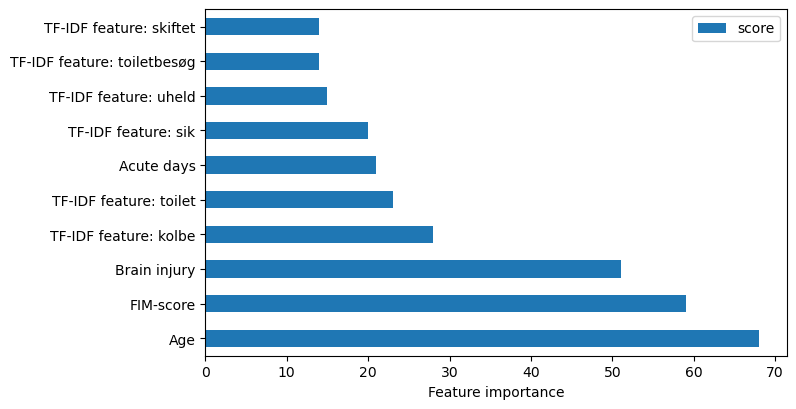

In [2]:
from xgboost import XGBClassifier
from XGB_pipeline import XGB_evaluation

xgb_model_tfidf = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.4,
                                enable_categorical = True,
                                gamma = 0.2,
                                learning_rate = 0.02270605126518848,
                                max_depth = 3,
                                min_child_weight = 7,
                                n_estimators = 102,
                                random_state = 42,
                                reg_alpha = 6.430858316394838,
                                reg_lambda = 20.305036607815396,
                                subsample = 0.7286325808068643,
                                tree_method = 'hist')


XGB_evaluation(xgb_model_tfidf, 
            X_final_train_tfidf, 
            y_final_train_tfidf, 
            X_final_test_tfidf, 
            y_final_test_tfidf)

        

## testing on the full test, but training on the resampled, estimate of how far we are from something that is clinically usable

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.6196481  0.60026896 0.6024195  0.67419496 0.62510706]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 107. False Positives: 5462. True negatives: 13940. False negatives: 151.
Accuracy: 71.45%
Precision = 0.01564896059723503
Recall = 0.41472868217054265
F1 score = 0.036725587781019385
ROC-AUC score = 0.566605656413588


array([0, 0, 0, ..., 0, 0, 0])

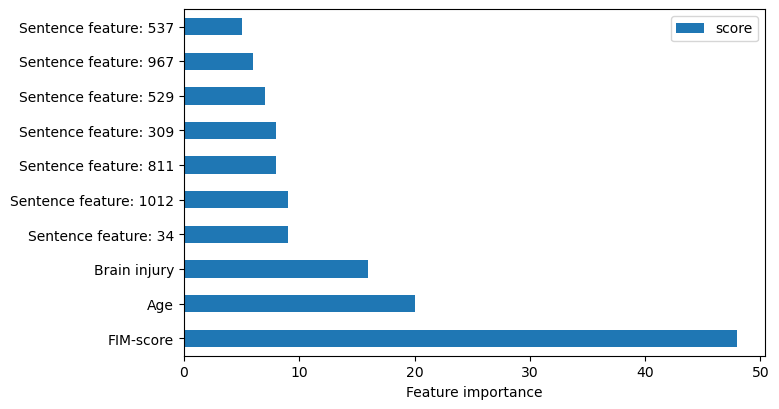

In [3]:
xgb_model_sentence = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.5,
                                enable_categorical = True,
                                gamma = 0.4,
                                learning_rate = 0.03242693094605598,
                                max_depth = 3,
                                min_child_weight = 7,
                                n_estimators = 82,
                                random_state = 42,
                                reg_alpha = 10.877874303668692,
                                reg_lambda = 4.576454184426576,
                                subsample = 0.6832343922914299,
                                tree_method = 'hist') 


XGB_evaluation(xgb_model_sentence, 
                X_final_train_sentence, 
                y_final_train_sentence, 
                X_final_test_sentence,
                y_final_test_sentence)

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.47970643 0.49959431 0.49913384 0.49450222 0.50299298]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 127. False Positives: 6290. True negatives: 13112. False negatives: 131.
Accuracy: 67.34%
Precision = 0.01640544552865085
Recall = 0.49224806201550386
F1 score = 0.038052434456928845
ROC-AUC score = 0.5840273399449749


array([0, 0, 0, ..., 0, 0, 0])

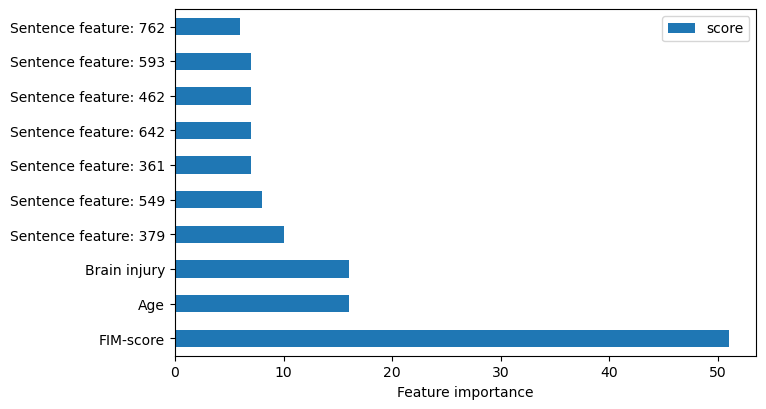

In [4]:
#REMEMBER TO INSERT NEWLY FOUND BEST PARAMS
xgb_model_sentence_MeDa = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.5,
                                enable_categorical = True,
                                gamma = 0.4,
                                learning_rate = 0.02270605126518848,
                                max_depth = 3,
                                min_child_weight = 7,
                                n_estimators = 82,
                                random_state = 42,
                                reg_alpha = 10.877874303668692,
                                reg_lambda = 4.576454184426576,
                                subsample = 0.6832343922914299,
                                tree_method = 'hist') 


XGB_evaluation(xgb_model_sentence_MeDa, 
                X_final_train_sentence_MeDa, 
                y_final_train_sentence_MeDa, 
                X_final_test_sentence_MeDa,
                y_final_test_sentence_MeDa)

#### Resampled full models

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.71527778 0.76923077 0.72027972 0.71328671 0.69230769]
ROC-AUC: [0.72210999 0.80211203 0.73461892 0.71854913 0.69591837]
F1-score: [0.3880597  0.49230769 0.39393939 0.4057971  0.21428571]
MODEL PERFORMANCE DURING TESTING:
True Positives: 55. False Positives: 46. True negatives: 166. False negatives: 41.
Accuracy: 71.75%
Precision = 0.44510120654922636
Recall = 0.5729166666666666
F1 score = 0.5583756345177665
ROC-AUC score = 0.6779677672955974


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,

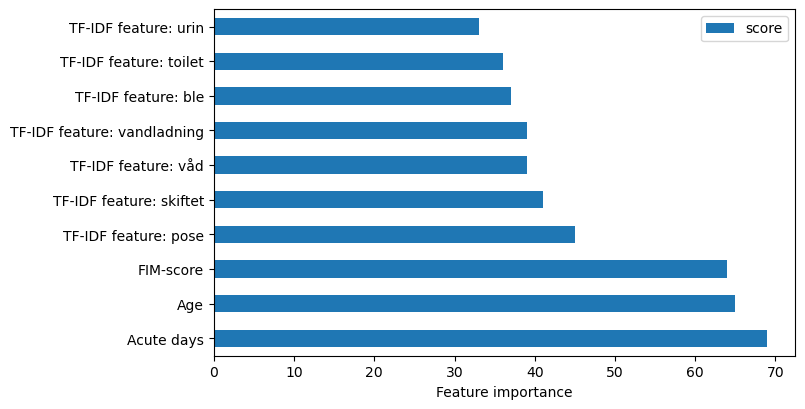

In [5]:
xgb_model_tfidf_resampled = XGBClassifier(objective = 'binary:logistic',
                                    colsample_bytree = 0.3,
                                    enable_categorical = True,
                                    gamma = 0.3,
                                    learning_rate = 0.06632882178455393,
                                    max_depth = 12,
                                    min_child_weight = 1,
                                    n_estimators = 139,
                                    random_state = 42,
                                    reg_alpha = 2.9534422801276774,
                                    reg_lambda = 14.684660530243137,
                                    subsample =  0.7200762468698007,
                                    tree_method = 'hist') 


XGB_evaluation(xgb_model_tfidf_resampled, 
            X_final_train_tfidf_resampled, 
            y_final_train_tfidf_resampled, 
            X_final_test_tfidf_resampled, 
            y_final_test_tfidf_resampled)

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.70833333 0.72727273 0.70629371 0.73426573 0.68531469]
ROC-AUC: [0.68709315 0.72428834 0.75321396 0.70615243 0.63854875]
F1-score: [0.38235294 0.45070423 0.34375    0.47222222 0.21052632]
MODEL PERFORMANCE DURING TESTING:
True Positives: 48. False Positives: 35. True negatives: 177. False negatives: 48.
Accuracy: 73.05%
Precision = 0.4450007823501799
Recall = 0.5
F1 score = 0.536312849162011
ROC-AUC score = 0.6674528301886792


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

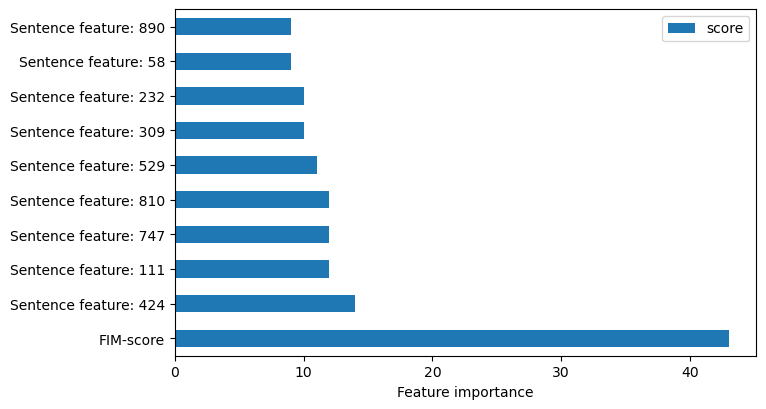

In [6]:
xgb_model_sentence_resampled = XGBClassifier(objective = 'binary:logistic',
                                            colsample_bytree = 0.5,
                                            enable_categorical = True,
                                            gamma = 0.0,
                                            learning_rate = 0.04988209014447946,
                                            max_depth = 5,
                                            min_child_weight = 7,
                                            n_estimators = 107,
                                            random_state = 42,
                                            reg_alpha = 2.569127626845319,
                                            reg_lambda = 1.5070148683091502,
                                            subsample = 0.9813242073389625,
                                            tree_method = 'hist')


XGB_evaluation(xgb_model_sentence_resampled, 
                X_final_train_sentence_resampled, 
                y_final_train_sentence_resampled, 
                X_final_test_sentence_resampled,
                y_final_test_sentence_resampled)

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.71527778 0.73426573 0.71328671 0.74125874 0.6993007 ]
ROC-AUC: [0.66936027 0.76033058 0.70936639 0.6533517  0.57437642]
F1-score: [0.22641509 0.24       0.12765957 0.2745098  0.12244898]
MODEL PERFORMANCE DURING TESTING:
True Positives: 51. False Positives: 48. True negatives: 164. False negatives: 45.
Accuracy: 69.81%
Precision = 0.4197781385281385
Recall = 0.53125
F1 score = 0.5230769230769231
ROC-AUC score = 0.6524174528301887


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

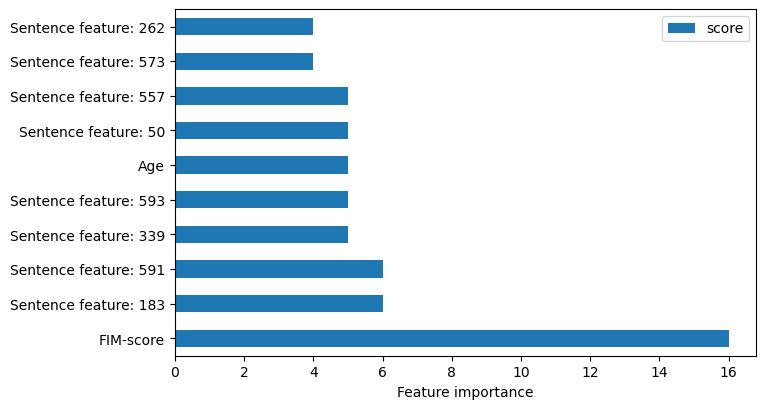

In [7]:
#REMEMBER TO INSERT NEWLY FOUND BEST PARAMS
xgb_model_sentence_MeDa_resampled = XGBClassifier(objective = 'binary:logistic',
                                            colsample_bytree = 0.4,
                                            enable_categorical = True,
                                            gamma = 0.4,
                                            learning_rate = 0.07323058305935795,
                                            max_depth = 8,
                                            min_child_weight = 3,
                                            n_estimators = 188,
                                            random_state = 42,
                                            reg_alpha = 17.32863746438768,
                                            reg_lambda = 16.966902499691024,
                                            subsample = 0.5753587719827147,
                                            tree_method = 'hist')


XGB_evaluation(xgb_model_sentence_MeDa_resampled, 
                X_final_train_sentence_MeDa_resampled, 
                y_final_train_sentence_MeDa_resampled, 
                X_final_test_sentence_MeDa_resampled,
                y_final_test_sentence_MeDa_resampled)

#### Text only models


MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.60690893 0.56470986 0.59415339 0.57562168 0.51715723]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 161. False Positives: 8015. True negatives: 11387. False negatives: 97.
Accuracy: 58.74%
Precision = 0.017222157720863905
Recall = 0.624031007751938
F1 score = 0.03817880009485416
ROC-AUC score = 0.6054646328317468


array([0, 0, 0, ..., 1, 1, 1])

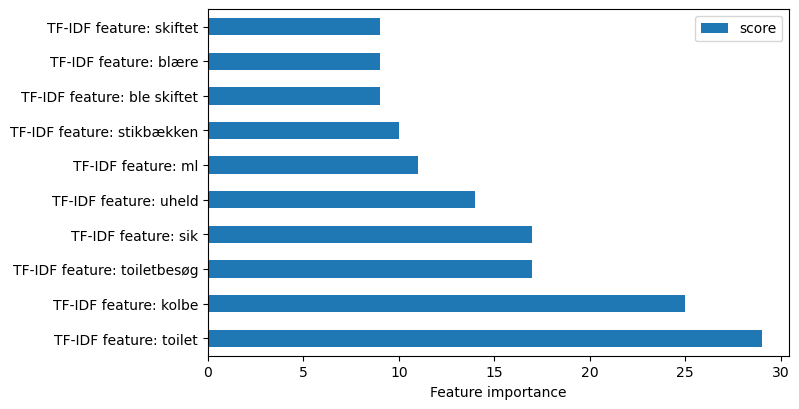

In [8]:
xgb_model_tfidf_text = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.5,
                                enable_categorical = True,
                                gamma = 0.4,
                                learning_rate = 0.03242693094605598,
                                max_depth = 3,
                                min_child_weight = 7,
                                n_estimators = 82,
                                random_state = 42,
                                reg_alpha = 10.877874303668692,
                                reg_lambda = 4.576454184426576,
                                subsample = 0.6832343922914299,
                                tree_method = 'hist')


XGB_evaluation(xgb_model_tfidf_text, 
            X_final_train_tfidf_text, 
            y_final_train_tfidf_text, 
            X_final_test_tfidf_text, 
            y_final_test_tfidf_text,
            categorical = False,)


MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.58205623 0.59303063 0.60890263 0.65150575 0.59271778]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 96. False Positives: 5461. True negatives: 13941. False negatives: 162.
Accuracy: 71.40%
Precision = 0.014668177520384719
Recall = 0.37209302325581395
F1 score = 0.033018056749785044
ROC-AUC score = 0.5453135974953434


array([0, 0, 0, ..., 0, 0, 0])

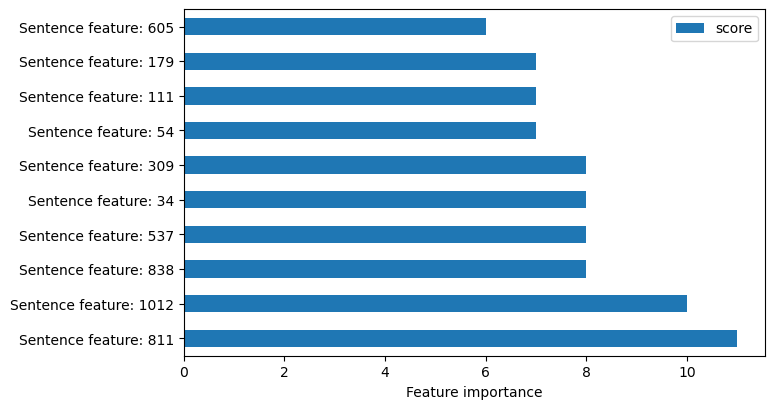

In [9]:
xgb_model_sentence_text = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.5,
                                enable_categorical = True,
                                gamma = 0.4,
                                learning_rate = 0.03242693094605598,
                                max_depth = 3,
                                min_child_weight = 7,
                                n_estimators = 82,
                                random_state = 42,
                                reg_alpha = 10.877874303668692,
                                reg_lambda = 4.576454184426576,
                                subsample = 0.6832343922914299,
                                tree_method = 'hist')


XGB_evaluation(xgb_model_sentence_text, 
                X_final_train_sentence_text, 
                y_final_train_sentence_text, 
                X_final_test_sentence_text,
                y_final_test_sentence_text,
                categorical = False)

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.47881062 0.60367034 0.5092628  0.52854455 0.51058627]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 114. False Positives: 5993. True negatives: 13409. False negatives: 144.
Accuracy: 68.78%
Precision = 0.015572771742491267
Recall = 0.4418604651162791
F1 score = 0.03582089552238806
ROC-AUC score = 0.5664873916139069


array([0, 0, 0, ..., 0, 0, 0])

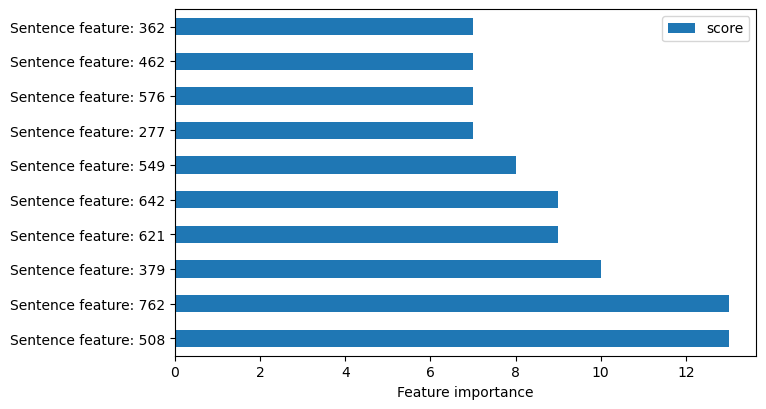

In [10]:
xgb_model_sentence_MeDa_text = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.4,
                                enable_categorical = True,
                                gamma = 0.2,
                                learning_rate = 0.02270605126518848,
                                max_depth = 3,
                                min_child_weight = 7,
                                n_estimators = 102,
                                random_state = 42,
                                reg_alpha = 6.430858316394838,
                                reg_lambda = 20.305036607815396,
                                subsample = 0.7286325808068643,
                                tree_method = 'hist')


XGB_evaluation(xgb_model_sentence_MeDa_text, 
                X_final_train_sentence_MeDa_text, 
                y_final_train_sentence_MeDa_text, 
                X_final_test_sentence_MeDa_text,
                y_final_test_sentence_MeDa_text,
                categorical = False)

#### Resampled text only models

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.72222222 0.72027972 0.72727273 0.73426573 0.68531469]
ROC-AUC: [0.69068462 0.72566575 0.67470156 0.68847567 0.69070295]
F1-score: [0.25925926 0.2        0.20408163 0.2962963  0.21052632]
MODEL PERFORMANCE DURING TESTING:
True Positives: 45. False Positives: 45. True negatives: 167. False negatives: 51.
Accuracy: 68.83%
Precision = 0.3999594155844156
Recall = 0.46875
F1 score = 0.4838709677419355
ROC-AUC score = 0.6282429245283019


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,

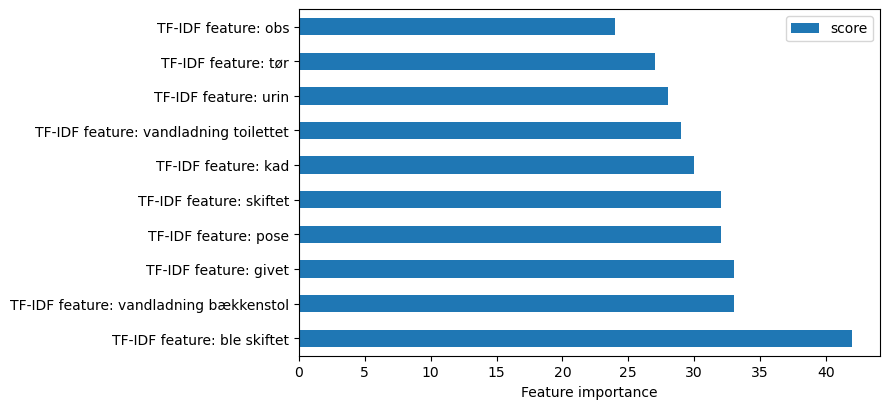

In [11]:
#REMEMBER TO INSERT NEWLY FOUND BEST PARAMS
xgb_model_tfidf_text_resampled = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.5,
                                enable_categorical = True,
                                gamma = 0.3,
                                learning_rate = 0.017543454708976926,
                                max_depth = 11,
                                min_child_weight = 1,
                                n_estimators = 63,
                                random_state = 42,
                                reg_alpha = 6.889878936788597,
                                reg_lambda = 20.916627500587413,
                                subsample = 0.8484625279319074,
                                tree_method = 'hist')


XGB_evaluation(xgb_model_tfidf_text_resampled, 
            X_final_train_tfidf_text_resampled, 
            y_final_train_tfidf_text_resampled, 
            X_final_test_tfidf_text_resampled, 
            y_final_test_tfidf_text_resampled,
            categorical = False,)


MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.70833333 0.74125874 0.69230769 0.75524476 0.6993007 ]
ROC-AUC: [0.67340067 0.69467401 0.67653811 0.68962351 0.59705215]
F1-score: [0.36363636 0.41269841 0.15384615 0.46153846 0.21818182]
MODEL PERFORMANCE DURING TESTING:
True Positives: 45. False Positives: 44. True negatives: 168. False negatives: 51.
Accuracy: 69.16%
Precision = 0.4025928425507077
Recall = 0.46875
F1 score = 0.4864864864864865
ROC-AUC score = 0.6306014150943398


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

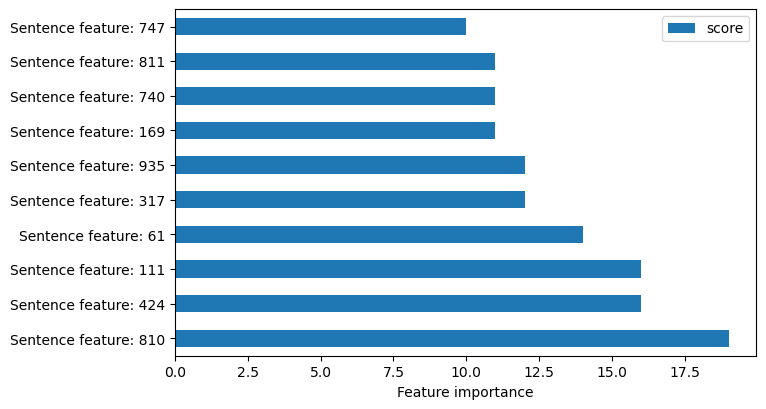

In [12]:
#REMEMBER TO INSERT NEWLY FOUND BEST PARAMS
xgb_model_sentence_text_resampled = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.5,
                                enable_categorical = True,
                                gamma = 0.3,
                                learning_rate = 0.020717201133977604,
                                max_depth = 12,
                                min_child_weight = 3,
                                n_estimators = 164,
                                random_state = 42,
                                reg_alpha = 5.849410072694593,
                                reg_lambda = 6.384864618987619,
                                subsample = 0.6886420815523113,
                                tree_method = 'hist')


XGB_evaluation(xgb_model_sentence_text_resampled, 
                X_final_train_sentence_text_resampled, 
                y_final_train_sentence_text_resampled, 
                X_final_test_sentence_text_resampled,
                y_final_test_sentence_text_resampled,
                categorical = False)

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.70138889 0.72727273 0.6993007  0.70629371 0.71328671]
ROC-AUC: [0.65791246 0.72566575 0.70156107 0.68778696 0.7       ]
F1-score: [0.4109589  0.4        0.3943662  0.43243243 0.25454545]
MODEL PERFORMANCE DURING TESTING:
True Positives: 43. False Positives: 38. True negatives: 174. False negatives: 53.
Accuracy: 70.45%
Precision = 0.40986084388862165
Recall = 0.4479166666666667
F1 score = 0.4858757062146893
ROC-AUC score = 0.6343356918238994


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

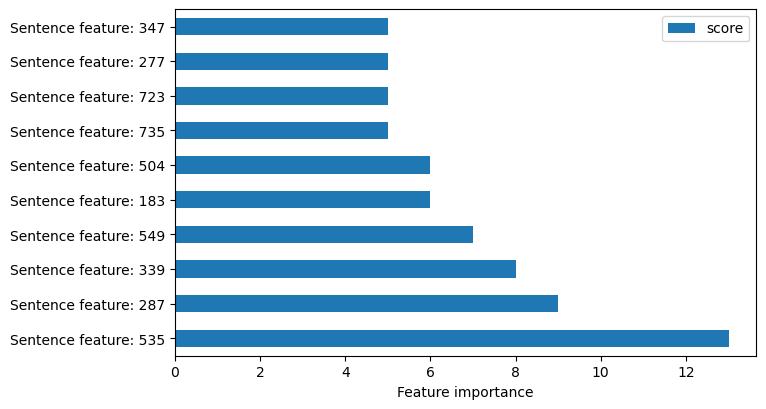

In [13]:
#REMEMBER TO INSERT NEWLY FOUND BEST PARAMS
xgb_model_sentence_MeDa_text_resampled = XGBClassifier(objective = 'binary:logistic',
                                colsample_bytree = 0.5,
                                enable_categorical = True,
                                gamma = 0.1,
                                learning_rate = 0.09101133946791808,
                                max_depth = 11,
                                min_child_weight = 7,
                                n_estimators = 62,
                                random_state = 42,
                                reg_alpha = 2.631883608004807,
                                reg_lambda = 1.1036972554797355,
                                subsample = 0.813947207474318,
                                tree_method = 'hist')


XGB_evaluation(xgb_model_sentence_MeDa_text_resampled, 
                X_final_train_sentence_MeDa_text_resampled, 
                y_final_train_sentence_MeDa_text_resampled, 
                X_final_test_sentence_MeDa_text_resampled,
                y_final_test_sentence_MeDa_text_resampled,
                categorical = False)

#### Baseline model

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.5        0.5        0.50495599 0.5        0.5       ]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 122. False Positives: 8171. True negatives: 11231. False negatives: 136.
Accuracy: 57.75%
Precision = 0.013874059150064497
Recall = 0.4728682170542636
F1 score = 0.028534674307098586
ROC-AUC score = 0.5258630333802397


array([0, 0, 0, ..., 1, 1, 1])

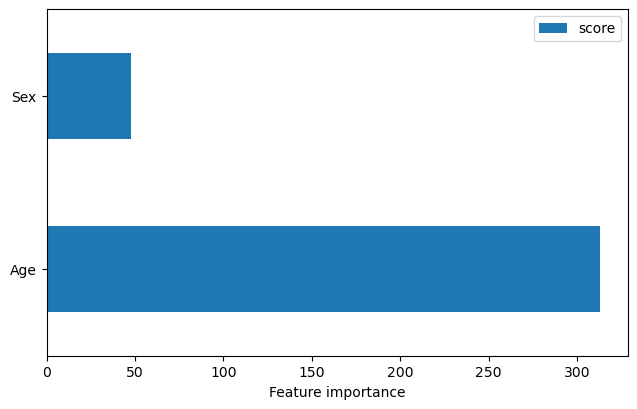

In [14]:
from xgboost import XGBClassifier
from XGB_pipeline import XGB_evaluation


X_final_train_baseline = X_final_train_tfidf[['pred_df_age_static', 'pred_df_female_static']]
X_final_test_baseline = X_final_test_tfidf[['pred_df_age_static', 'pred_df_female_static']]

X_final_train_baseline_resampled = X_final_train_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static']]
X_final_test_baseline_resampled = X_final_test_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static']]



#Full baseline
xgb_model_baseline = XGBClassifier(objective = 'binary:logistic',
                                    colsample_bytree = 0.4,
                                    enable_categorical = True,
                                    gamma = 0.2,
                                    learning_rate = 0.02270605126518848,
                                    max_depth = 3,
                                    min_child_weight = 7,
                                    n_estimators = 102,
                                    random_state = 42,
                                    reg_alpha = 6.430858316394838,
                                    reg_lambda = 20.305036607815396,
                                    subsample = 0.7286325808068643,
                                    tree_method = 'hist')                              


XGB_evaluation(xgb_model_baseline, 
                X_final_train_baseline, 
                y_final_train_tfidf, 
                X_final_test_baseline,
                y_final_test_tfidf, 
                categorical = False,
                no_specs = False)




MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.6875     0.69230769 0.69230769 0.69230769 0.68531469]
ROC-AUC: [0.58698092 0.62396694 0.61225895 0.57610193 0.5792517 ]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 45. False Positives: 84. True negatives: 128. False negatives: 51.
Accuracy: 56.17%
Precision = 0.32910185744488074
Recall = 0.46875
F1 score = 0.4000000000000001
ROC-AUC score = 0.5362617924528301


array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

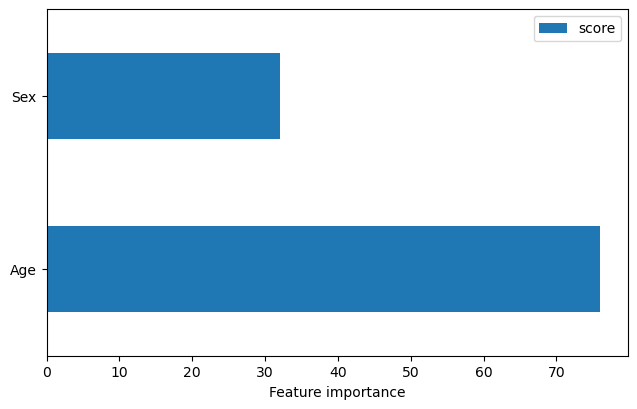

In [15]:
#Resampled baseline
xgb_model_baseline_resampled = XGBClassifier(objective = 'binary:logistic',
                                    colsample_bytree = 0.5,
                                    enable_categorical = True,
                                    gamma = 0.1,
                                    learning_rate = 0.07158500980522164,
                                    max_depth = 7,
                                    min_child_weight = 7,
                                    n_estimators = 83,
                                    random_state = 42,
                                    reg_alpha = 6.2178724668342795,
                                    reg_lambda = 1.306090805807695,
                                    subsample = 0.9667181540397415,
                                    tree_method = 'hist')                              


XGB_evaluation(xgb_model_baseline_resampled, 
                X_final_train_baseline_resampled, 
                y_final_train_tfidf_resampled, 
                X_final_test_baseline_resampled,
                y_final_test_tfidf_resampled, 
                categorical = False,
                no_specs = False)

#### Clinical feature model

e:\Projekter\RHN\linapd\XGB_pipeline.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["pred_df_brain_injury_static"]] = X_train[["pred_df_brain_injury_static"]].astype("category")


MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.9874806  0.9874806  0.98758278 0.98758278 0.9874793 ]
ROC-AUC: [0.5        0.5        0.50495599 0.5        0.5       ]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 172. False Positives: 9613. True negatives: 9789. False negatives: 86.
Accuracy: 50.67%
Precision = 0.016092981121927478
Recall = 0.6666666666666666
F1 score = 0.03425271333266952
ROC-AUC score = 0.585601140775865


array([0, 0, 0, ..., 1, 1, 1])

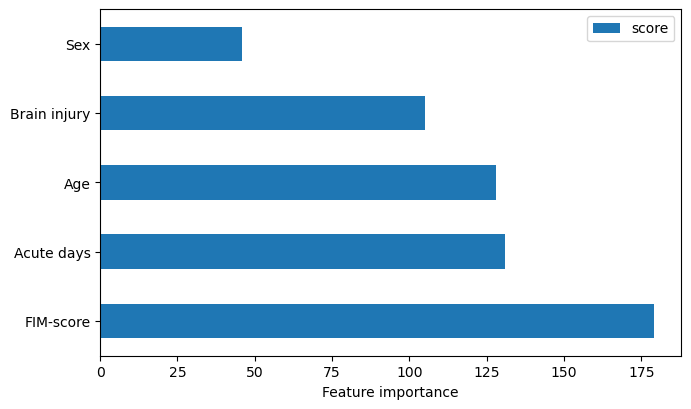

In [16]:
X_final_train_clinical = X_final_train_tfidf[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]
X_final_test_clinical = X_final_test_tfidf[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]

X_final_train_clinical_resampled = X_final_train_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]
X_final_test_clinical_resampled = X_final_test_tfidf_resampled[['pred_df_age_static', 'pred_df_female_static', 'pred_df_acute_days_static', 'pred_df_brain_injury_static', 'pred_df_FIM_total_dynamic_within_4_days_mean_fallback_nan']]



xgb_model_clinical = XGBClassifier(objective = 'binary:logistic',
                                    colsample_bytree = 0.4,
                                    enable_categorical = True,
                                    gamma = 0.2,
                                    learning_rate = 0.02270605126518848,
                                    max_depth = 3,
                                    min_child_weight = 7,
                                    n_estimators = 102,
                                    random_state = 42,
                                    reg_alpha = 6.430858316394838,
                                    reg_lambda = 20.305036607815396,
                                    subsample = 0.7286325808068643,
                                    tree_method = 'hist')


XGB_evaluation(xgb_model_clinical, 
                X_final_train_clinical, 
                y_final_train_tfidf, 
                X_final_test_clinical,
                y_final_test_tfidf)

e:\Projekter\RHN\linapd\XGB_pipeline.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["pred_df_brain_injury_static"]] = X_train[["pred_df_brain_injury_static"]].astype("category")


MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.6875     0.69230769 0.69230769 0.69230769 0.68531469]
ROC-AUC: [0.68619529 0.77100551 0.68193297 0.68216253 0.61984127]
F1-score: [0. 0. 0. 0. 0.]
MODEL PERFORMANCE DURING TESTING:
True Positives: 67. False Positives: 82. True negatives: 130. False negatives: 29.
Accuracy: 63.96%
Precision = 0.4079841439321305
Recall = 0.6979166666666666
F1 score = 0.5469387755102041
ROC-AUC score = 0.6555621069182389


array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,

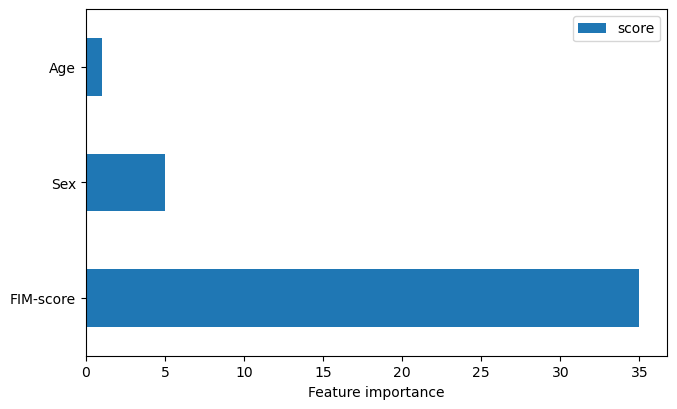

In [17]:
xgb_model_clinical_resampled = XGBClassifier(objective = 'binary:logistic',
                                    colsample_bytree = 0.3,
                                    enable_categorical = True,
                                    gamma = 0.4,
                                    learning_rate = 0.014315991195057613,
                                    max_depth = 7,
                                    min_child_weight = 7,
                                    n_estimators = 167,
                                    random_state = 42,
                                    reg_alpha = 19.49286660447192,
                                    reg_lambda = 19.38231430557319,
                                    subsample = 0.6264950839946206,
                                    tree_method = 'hist')


XGB_evaluation(xgb_model_clinical_resampled, 
                X_final_train_clinical_resampled, 
                y_final_train_tfidf_resampled, 
                X_final_test_clinical_resampled,
                y_final_test_tfidf_resampled)

#### Evaluting the resampled model on all data

In [30]:
#Need to create embeddings for the full data, which is based on the tf-idf training on the resampled data.
from tfidf import tf_idf
df_tfidfvect_train_resampled_new, df_tfidfvect_test_resampled_new = tf_idf(predictor_dict_train_resampled["df_SFI_text"], 
                                                                            predictor_dict_test["df_SFI_text"], 
                                                                            min_df = 0, 
                                                                            max_df = 0.7, 
                                                                            max_features = 500, 
                                                                            ngram_range = (1,1))

e:\Projekter\RHN\linapd\tfidf.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_SFI['note'] = X_train_SFI['note'].str.replace('\d+', '')
e:\Projekter\RHN\linapd\tfidf.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_SFI['note'] = X_test_SFI['note'].str.replace('\d+', '')


Tokens ['adspurgt' 'aff' 'afføring' 'afklemning' 'afklemt' 'afprøve' 'aftale'
 'aftaler' 'aftalt' 'aften' 'aftenen' 'aftenvagt' 'aftenvagten' 'afventer'
 'afviser' 'alm' 'anlagt' 'av' 'bad' 'badeværelset' 'bagefter' 'ballon'
 'bare' 'beder' 'bedre' 'bedt' 'behandling' 'behov' 'benpose' 'bent'
 'besøg' 'bind' 'bjarne' 'blank' 'ble' 'blee' 'bleen' 'bleer' 'bleskift'
 'bleskiftet' 'blevet' 'blod' 'blære' 'blæren' 'blærescan' 'blærescanne'
 'blærescannes' 'blærescannet' 'blærescanning' 'blæreskannet'
 'bodystocking' 'brug' 'bruge' 'bruger' 'brugt' 'bukseble' 'buksebleen'
 'bukser' 'bukserne' 'bundskift' 'bundskifte' 'bundskiftes' 'bundskiftet'
 'både' 'bækken' 'bækkenstol' 'bækkenstolen' 'bælteble' 'ca' 'carsten'
 'ch' 'dag' 'dage' 'dagen' 'dagvagt' 'dagvagten' 'dd' 'del' 'derud'
 'desuden' 'desværre' 'diurese' 'drikke' 'drukket' 'dv' 'dyrkning' 'døgn'
 'effekt' 'efterfølgende' 'efterscan' 'efterscannet' 'eget' 'ej' 'ekstra'
 'else' 'enkelt' 'erik' 'evt' 'falder' 'faldet' 'faldt' 'faste' '

In [31]:
from preparing_specs import preparing_specs

#Preparing specs for testing based on new embeddings. This will ensure that there are the same predictor columns in the test and training sets.

################## Test
X_final_test_tfidf_new, y_final_test_tfidf_new = preparing_specs(embeddings = df_tfidfvect_test_resampled_new,
                                                            predictor_dict = predictor_dict_test,
                                                            prediction_times = df_admissions_test, 
                                                            outcome_df = y_test_df, 
                                                            embedding_type ="tfidf",
                                                            lookbehind = 4, 
                                                            lookahead = 3)


2024-04-25 14:34:27 [INFO] df_FIM_total_dynamic: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:27 [INFO] tfidfadspurgt: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:27 [INFO] tfidfaff: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:27 [INFO] tfidfafføring: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:27 [INFO] tfidfafklemning: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:27 [INFO] tfidfafklemt: Converting timestamp column to datetime64[ns]


Training specs will take a while


2024-04-25 14:34:28 [INFO] tfidfafprøve: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfaftale: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfaftaler: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfaftenen: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfaftenvagt: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfafventer: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:28 [INFO] tfidfafviser: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:29 [INFO] tfidfalm: Converting timestamp column to datetime64[ns]
2024-04-25 14:34:29 [INFO] tfidfanlagt: Conv

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.71527778 0.76923077 0.72027972 0.71328671 0.69230769]
ROC-AUC: [0.72210999 0.80211203 0.73461892 0.71854913 0.69591837]
F1-score: [0.3880597  0.49230769 0.39393939 0.4057971  0.21428571]
MODEL PERFORMANCE DURING TESTING:
True Positives: 148. False Positives: 9799. True negatives: 9603. False negatives: 110.
Accuracy: 49.60%
Precision = 0.014130275811188527
Recall = 0.5736434108527132
F1 score = 0.02900538951494365
ROC-AUC score = 0.5342961925926282


array([1, 1, 1, ..., 0, 0, 0])

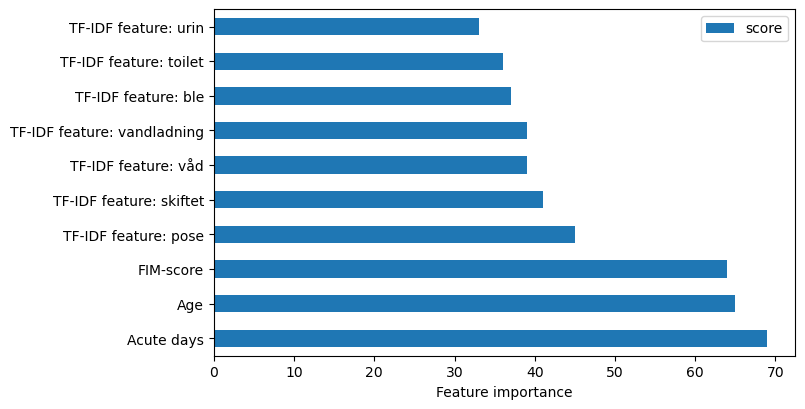

In [32]:
#Evaluating resampled model in a clinically applicable situation: 
from xgboost import XGBClassifier
from XGB_pipeline import XGB_evaluation

xgb_model_tfidf_resampled = XGBClassifier(objective = 'binary:logistic',
                                    colsample_bytree = 0.3,
                                    enable_categorical = True,
                                    gamma = 0.3,
                                    learning_rate = 0.06632882178455393,
                                    max_depth = 12,
                                    min_child_weight = 1,
                                    n_estimators = 139,
                                    random_state = 42,
                                    reg_alpha = 2.9534422801276774,
                                    reg_lambda = 14.684660530243137,
                                    subsample =  0.7200762468698007,
                                    tree_method = 'hist') 


XGB_evaluation(xgb_model_tfidf_resampled, 
            X_final_train_tfidf_resampled, 
            y_final_train_tfidf_resampled,  
            X_final_test_tfidf_new, 
            y_final_test_tfidf_new)

MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.70833333 0.72727273 0.70629371 0.73426573 0.68531469]
ROC-AUC: [0.68709315 0.72428834 0.75321396 0.70615243 0.63854875]
F1-score: [0.38235294 0.45070423 0.34375    0.47222222 0.21052632]
MODEL PERFORMANCE DURING TESTING:
True Positives: 116. False Positives: 8970. True negatives: 10432. False negatives: 142.
Accuracy: 53.65%
Precision = 0.012962941332251534
Recall = 0.4496124031007752
F1 score = 0.02482876712328767
ROC-AUC score = 0.49364446564687253


array([1, 1, 1, ..., 0, 0, 0])

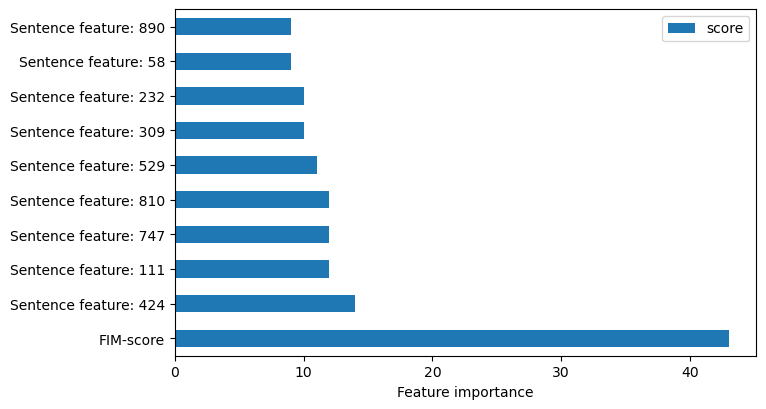

In [33]:
#Evaluating resampled model in a clinically applicable situation: 


XGB_evaluation(xgb_model_sentence_resampled, 
                X_final_train_sentence_resampled, 
                y_final_train_sentence_resampled, 
                X_final_test_sentence,
                y_final_test_sentence)



MODEL PERFORMANCE DURING TRAINING:
Accuracy: [0.71527778 0.73426573 0.71328671 0.74125874 0.6993007 ]
ROC-AUC: [0.66936027 0.76033058 0.70936639 0.6533517  0.57437642]
F1-score: [0.22641509 0.24       0.12765957 0.2745098  0.12244898]
MODEL PERFORMANCE DURING TESTING:
True Positives: 136. False Positives: 9730. True negatives: 9672. False negatives: 122.
Accuracy: 49.89%
Precision = 0.013471854879644574
Recall = 0.5271317829457365
F1 score = 0.026866851047016988
ROC-AUC score = 0.5128185458383976


array([1, 1, 1, ..., 1, 0, 0])

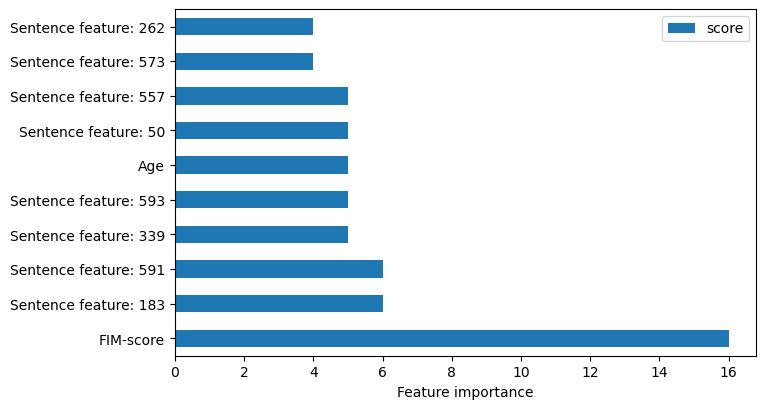

In [34]:
#Evaluating resampled model in a clinically applicable situation: 

XGB_evaluation(xgb_model_sentence_MeDa_resampled, 
                X_final_train_sentence_MeDa_resampled, 
                y_final_train_sentence_MeDa_resampled, 
                X_final_test_sentence_MeDa,
                y_final_test_sentence_MeDa)